In [1224]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import os
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox




In [1225]:
file_URLS = {
    'Price_Growth_Rates' : 'https://raw.githubusercontent.com/farhodibr/CUNY-SPS-MSDS/refs/heads/main/DATA608/PROJECT7/DATA/MCS2025_Fig10_Price_Growth_Rates.csv',
    'Pch_Consump_2023_2024' : 'https://raw.githubusercontent.com/farhodibr/CUNY-SPS-MSDS/refs/heads/main/DATA608/PROJECT7/DATA/MCS2025_Fig11_Pch_Consump_2023_2024.csv',
    'Scrap' : 'https://raw.githubusercontent.com/farhodibr/CUNY-SPS-MSDS/refs/heads/main/DATA608/PROJECT7/DATA/MCS2025_Fig13_Scrap.csv',
    'Minerals_in_Economy':'https://raw.githubusercontent.com/farhodibr/CUNY-SPS-MSDS/refs/heads/main/DATA608/PROJECT7/DATA/MCS2025_Fig1_Minerals_in_Economy.csv',
    'Net_Import_Reliance': 'https://raw.githubusercontent.com/farhodibr/CUNY-SPS-MSDS/refs/heads/main/DATA608/PROJECT7/DATA/MCS2025_Fig2_Net_Import_Reliance.csv',
    'Major_Import_Sources':'https://raw.githubusercontent.com/farhodibr/CUNY-SPS-MSDS/refs/heads/main/DATA608/PROJECT7/DATA/MCS2025_Fig3_Major_Import_Sources.csv',
    'Value_by_Type': 'https://raw.githubusercontent.com/farhodibr/CUNY-SPS-MSDS/refs/heads/main/DATA608/PROJECT7/DATA/MCS2025_Fig4_Value_by_Type.csv',
    'Mineral_Industry_Trends':'https://raw.githubusercontent.com/farhodibr/CUNY-SPS-MSDS/refs/heads/main/DATA608/PROJECT7/DATA/MCS2025_T1_Mineral_Industry_Trends.csv',
    'Mineral_Economic_Trends': 'https://raw.githubusercontent.com/farhodibr/CUNY-SPS-MSDS/refs/heads/main/DATA608/PROJECT7/DATA/MCS2025_T2_Mineral_Economic_Trends.csv',
    'State_Value_Rank':'https://raw.githubusercontent.com/farhodibr/CUNY-SPS-MSDS/refs/heads/main/DATA608/PROJECT7/DATA/MCS2025_T3_State_Value_Rank.csv',
    'Critical_Minerals_End_Use': 'https://raw.githubusercontent.com/farhodibr/CUNY-SPS-MSDS/refs/heads/main/DATA608/PROJECT7/DATA/MCS2025_T4_Critical_Minerals_End_Use.csv',
    'Critical_Minerals_Salient':'https://raw.githubusercontent.com/farhodibr/CUNY-SPS-MSDS/refs/heads/main/DATA608/PROJECT7/DATA/MCS2025_T5_Critical_Minerals_Salient.csv',
    'Countries_centroids' :'https://raw.githubusercontent.com/farhodibr/CUNY-SPS-MSDS/refs/heads/main/DATA608/PROJECT7/DATA/countries.csv' 
}

In [1226]:
tables = {}
for key, url in file_URLS.items():
    tables[key] = pd.read_csv(url)

In [1227]:
for name, df in tables.items():
    print(f'DataTable {name}')
    print(df.shape)
    print(df.columns)
    print()

DataTable Price_Growth_Rates
(40, 4)
Index(['critical_mineral_priced', 'PCH_2023_2024', 'CAGR_2020_2024', 'Notes'], dtype='object')

DataTable Pch_Consump_2023_2024
(78, 3)
Index(['Mineral_Commodity', 'Pch_Critical_Minerals_2023_2024',
       'Pch_Other_Minerals_2023_2024'],
      dtype='object')

DataTable Scrap
(15, 7)
Index(['Source', 'Scrap_type', 'Year', 'Scrap_value_mdol', 'Percent_domestic',
       'Percent_imported', 'Percent_exported'],
      dtype='object')

DataTable Minerals_in_Economy
(14, 6)
Index(['Source', 'Year', 'Nonfuel_Mineral_Economic_Inputs',
       'Value_billion_dollars', 'Category_example', 'Category_Note'],
      dtype='object')

DataTable Net_Import_Reliance
(64, 6)
Index(['Source', 'Import_Share_Order', 'Commodity',
       'Net_Import_Reliance_pct_2024', 'Major_Import_Sources_2020_2023',
       'Notes'],
      dtype='object')

DataTable Major_Import_Sources
(43, 4)
Index(['Source', 'Country', 'Commodity_Count', 'Map_Class'], dtype='object')

DataTable Value_

In [1228]:
salient_df = tables['Critical_Minerals_Salient'].copy()
salient_df.columns

Index(['Source', 'Year', 'Critical_mineral', 'Primary_prod', 'Secondary_prod',
       'Prod_notes', 'Apparent_Consumption', 'Consumption_Notes',
       'Net_Import_Reliance', 'Primary_import_source', 'Import_source_notes',
       'Leading_source_country', 'Leading_country_prod',
       'Leading_source_precent_world', 'World_total_prod', 'World_prod_notes'],
      dtype='object')

In [1229]:
salient_df['mineral_clean'] = salient_df.Critical_mineral.str.upper().str.strip().str.replace(r"\(.*\)", "", regex=True)
salient_df[['Critical_mineral', 'mineral_clean']].head(40)

,Critical_mineral,mineral_clean
0,Aluminum (bauxite),ALUMINUM
1,Antimony,ANTIMONY
2,Arsenic,ARSENIC
3,Barite,BARITE
4,Beryllium,BERYLLIUM
5,Bismuth,BISMUTH
6,Chromium,CHROMIUM
7,Cobalt,COBALT
8,Fluorspar,FLUORSPAR
9,Gallium,GALLIUM


In [1230]:
net_import_reliance_df = tables['Net_Import_Reliance'].copy()
net_import_reliance_df.columns

Index(['Source', 'Import_Share_Order', 'Commodity',
       'Net_Import_Reliance_pct_2024', 'Major_Import_Sources_2020_2023',
       'Notes'],
      dtype='object')

In [1231]:
net_import_reliance_df['commodity_clean'] = (net_import_reliance_df.Commodity
                                             .str.upper()
                                             .str.strip()
                                             .str.replace(r"\(.*\)", "", regex=True)
                                             .str.replace(',', '', regex=True)
                                             .str.replace(";", '', regex=True)
                                             .str.replace(r'\s+', ' ',regex=True)
                                             .str.strip()
                                             )

In [1232]:
net_import_reliance_df[['Commodity', 'commodity_clean']].head(40)

,Commodity,commodity_clean
0,"ARSENIC, all forms",ARSENIC ALL FORMS
1,ASBESTOS,ASBESTOS
2,CESIUM,CESIUM
3,FLUORSPAR,FLUORSPAR
4,"GALLIUM, metal",GALLIUM METAL
5,GRAPHITE (NATURAL),GRAPHITE
6,INDIUM,INDIUM
7,MANGANESE,MANGANESE
8,"MICA (NATURAL), sheet",MICA SHEET
9,NIOBIUM (COLUMBIUM),NIOBIUM


In [1233]:
merged_df = salient_df.merge(
    net_import_reliance_df,
    left_on = 'mineral_clean',
    right_on = 'commodity_clean',
    how='left'
)
merged_df[['Critical_mineral', 'commodity_clean']].head(40)

,Critical_mineral,commodity_clean
0,Aluminum (bauxite),NaN
1,Antimony,NaN
2,Arsenic,NaN
3,Barite,BARITE
4,Beryllium,NaN
5,Bismuth,NaN
6,Chromium,NaN
7,Cobalt,NaN
8,Fluorspar,FLUORSPAR
9,Gallium,NaN


In [1234]:
unmatched = merged_df[merged_df.commodity_clean.isna()]['mineral_clean'].unique()
unmatched

array(['ALUMINUM ', 'ANTIMONY', 'ARSENIC', 'BERYLLIUM', 'BISMUTH',
       'CHROMIUM', 'COBALT', 'GALLIUM', 'GRAPHITE ', 'MAGNESIUM',
       'RARE EARTHS ', 'TIN', 'TITANIUM ', 'YTTRIUM', 'ZINC',
       'ZIRCONIUM '], dtype=object)

In [1235]:
merged_df.commodity_clean.notna().sum()

np.int64(15)

In [1236]:
sorted(net_import_reliance_df.commodity_clean.unique())

['ABRASIVES FUSED ALUMINUM OXIDE',
 'ABRASIVES SILICON CARBIDE',
 'ALUMINA',
 'ALUMINUM',
 'ANTIMONY METAL AND OXIDE',
 'ARSENIC ALL FORMS',
 'ASBESTOS',
 'BARITE',
 'BAUXITE',
 'BISMUTH METAL ALLOYS AND SCRAP',
 'BROMINE',
 'CEMENT',
 'CESIUM',
 'CHROMIUM ALL FORMS',
 'COBALT METAL OXIDES AND SALTS',
 'COPPER REFINED',
 'DIAMOND BORT GRIT AND DUST AND POWDER',
 'DIAMOND STONES',
 'FELDSPAR',
 'FLUORSPAR',
 'GALLIUM METAL',
 'GARNET',
 'GEMSTONES',
 'GERMANIUM',
 'GRAPHITE',
 'INDIUM',
 'IODINE',
 'IRON OXIDE PIGMENTS NATURAL AND SYNTHETIC',
 'LEAD REFINED',
 'LITHIUM',
 'MAGNESIUM COMPOUNDS',
 'MAGNESIUM METAL',
 'MANGANESE',
 'MICA SCRAP AND FLAKE',
 'MICA SHEET',
 'NEPHELINE SYENITE',
 'NICKEL',
 'NIOBIUM',
 'PALLADIUM',
 'PEAT',
 'PERLITE',
 'PLATINUM',
 'POTASH',
 'RARE EARTHS COMPOUNDS AND METALS',
 'RHENIUM',
 'RUBIDIUM',
 'SALT',
 'SCANDIUM',
 'SELENIUM METAL',
 'SILICON METAL AND FERROSILICON',
 'SILVER',
 'STONE',
 'STRONTIUM',
 'TANTALUM',
 'TELLURIUM',
 'TIN REFINED',
 'TIT

In [1237]:
manual_map = {
    'ALUMINUM' : 'BAUXITE',
    'ANTIMONY' : 'ANTIMONY METAL AND OXIDE',
    'ARSENIC' : 'ARSENIC ALL FORMS',
    'BERYLLIUM' : None,
    'BISMUTH' : 'BISMUTH METAL ALLOYS AND SCRAP',
    'CHROMIUM' : 'CHROMIUM ALL FORMS',
    'COBALT' : 'COBALT METAL OXIDES AND SALTS',
    'GALLIUM' : 'GALLIUM METAL',
    'GRAPHITE' : 'GRAPHITE',
    'MAGNESIUM' : 'MAGNESIUM METAL',
    "RARE EARTHS": "RARE EARTHS COMPOUNDS AND METALS",
    'TIN' : 'TIN REFINED',
    'TITANIUM' : 'TITANIUM SPONGE METAL',
    'YTTRIUM' : 'YTTRIUM COMPOUNDS',
    'ZINC' : 'ZINC REFINED',
    'ZIRCONIUM' : 'ZIRCONIUM ORES AND CONCENTRATES'
}

salient_df['commodity_clean_mapped'] = (
    salient_df.mineral_clean.str.strip().map(manual_map)
)
salient_df.commodity_clean_mapped.unique()

array(['BAUXITE', 'ANTIMONY METAL AND OXIDE', 'ARSENIC ALL FORMS', nan,
       None, 'BISMUTH METAL ALLOYS AND SCRAP', 'CHROMIUM ALL FORMS',
       'COBALT METAL OXIDES AND SALTS', 'GALLIUM METAL', 'GRAPHITE',
       'MAGNESIUM METAL', 'RARE EARTHS COMPOUNDS AND METALS',
       'TIN REFINED', 'TITANIUM SPONGE METAL', 'YTTRIUM COMPOUNDS',
       'ZINC REFINED', 'ZIRCONIUM ORES AND CONCENTRATES'], dtype=object)

In [1238]:
auto_merge_df = salient_df.merge(
    net_import_reliance_df.commodity_clean,
    left_on='mineral_clean',
    right_on='commodity_clean',
    how='left'
)

salient_df['manual_match'] = salient_df.mineral_clean.map(manual_map)
salient_df['commodity_clean_final'] = salient_df['manual_match'].fillna(salient_df.mineral_clean)

In [1239]:
merged_df2 = salient_df.merge(
    net_import_reliance_df.commodity_clean,
    left_on= 'commodity_clean_final',
    right_on= 'commodity_clean',
    how='left'
)

merged_df2[['Critical_mineral', 'commodity_clean_final', 'commodity_clean']]

,Critical_mineral,commodity_clean_final,commodity_clean
0,Aluminum (bauxite),ALUMINUM,NaN
1,Antimony,ANTIMONY METAL AND OXIDE,ANTIMONY METAL AND OXIDE
2,Arsenic,ARSENIC ALL FORMS,ARSENIC ALL FORMS
3,Barite,BARITE,BARITE
4,Beryllium,BERYLLIUM,NaN
5,Bismuth,BISMUTH METAL ALLOYS AND SCRAP,BISMUTH METAL ALLOYS AND SCRAP
6,Chromium,CHROMIUM ALL FORMS,CHROMIUM ALL FORMS
7,Cobalt,COBALT METAL OXIDES AND SALTS,COBALT METAL OXIDES AND SALTS
8,Fluorspar,FLUORSPAR,FLUORSPAR
9,Gallium,GALLIUM METAL,GALLIUM METAL


In [1240]:
salient_df.mineral_clean = salient_df.mineral_clean.str.strip()
net_import_reliance_df.commodity_clean = net_import_reliance_df.commodity_clean.str.strip()
salient_df['manual_match'] = salient_df.mineral_clean.map(manual_map)
salient_df['commodity_clean_final'] = salient_df.manual_match.fillna(salient_df.mineral_clean)

In [1241]:
merged_df_final = salient_df.merge(
    net_import_reliance_df,
    left_on= 'commodity_clean_final',
    right_on= 'commodity_clean',
    how='left'
)

In [1242]:
merged_df_final[['Critical_mineral', 'commodity_clean_final', 'commodity_clean']]

,Critical_mineral,commodity_clean_final,commodity_clean
0,Aluminum (bauxite),BAUXITE,BAUXITE
1,Antimony,ANTIMONY METAL AND OXIDE,ANTIMONY METAL AND OXIDE
2,Arsenic,ARSENIC ALL FORMS,ARSENIC ALL FORMS
3,Barite,BARITE,BARITE
4,Beryllium,BERYLLIUM,NaN
5,Bismuth,BISMUTH METAL ALLOYS AND SCRAP,BISMUTH METAL ALLOYS AND SCRAP
6,Chromium,CHROMIUM ALL FORMS,CHROMIUM ALL FORMS
7,Cobalt,COBALT METAL OXIDES AND SALTS,COBALT METAL OXIDES AND SALTS
8,Fluorspar,FLUORSPAR,FLUORSPAR
9,Gallium,GALLIUM METAL,GALLIUM METAL


In [1243]:
merged_df_final.head()

,Source_x,Year,Critical_mineral,Primary_prod,Secondary_prod,Prod_notes,Apparent_Consumption,Consumption_Notes,Net_Import_Reliance,Primary_import_source,...,commodity_clean_mapped,manual_match,commodity_clean_final,Source_y,Import_Share_Order,Commodity,Net_Import_Reliance_pct_2024,Major_Import_Sources_2020_2023,Notes,commodity_clean
0,MCS2025,2024_estimated,Aluminum (bauxite),W,0,NaN,1800000,Reported consumption.,>75,Jamaica,...,BAUXITE,BAUXITE,BAUXITE,MCS2025,33.0,BAUXITE,>75,"Jamaica, Turkey, Guyana, Australia",Descending order of import share.,BAUXITE
1,MCS2025,2024_estimated,Antimony,0,3500,NaN,24000,NaN,85,China,...,ANTIMONY METAL AND OXIDE,ANTIMONY METAL AND OXIDE,ANTIMONY METAL AND OXIDE,MCS2025,24.0,"ANTIMONY, metal and oxide",85,"China, Belgium, India, Bolivia",Descending order of import share. Imports from...,ANTIMONY METAL AND OXIDE
2,MCS2025,2024_estimated,Arsenic,0,NaN,NaN,9100,Estimated consumption.,100,China,...,ARSENIC ALL FORMS,ARSENIC ALL FORMS,ARSENIC ALL FORMS,MCS2025,1.0,"ARSENIC, all forms",100,"China, Morocco, Malaysia, Belgium",Descending order of import share. Imports from...,ARSENIC ALL FORMS
3,MCS2025,2024_estimated,Barite,W,0,NaN,W,NaN,>75,India,...,NaN,NaN,BARITE,MCS2025,32.0,BARITE,>75,"India, China, Morocco, Mexico",Descending order of import share. Imports from...,BARITE
4,MCS2025,2024_estimated,Beryllium,180,NaN,NaN,170,NaN,E,Kazakhstan,...,None,None,BERYLLIUM,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1244]:
net_import_reliance_df.Major_Import_Sources_2020_2023.head(20)

0             China, Morocco, Malaysia, Belgium
1                                Brazil, Russia
2                                Germany, China
3          Mexico, Vietnam, South Africa, China
4                 Japan, China, Germany, Canada
5             China, Canada, Mexico, Mozambique
6     Republic of Korea, Japan, Canada, Belgium
7      Gabon, South Africa, Australia, Malaysia
8                          China, Brazil, India
9                              Brazil, Canada  
10                       China, Germany, Russia
11                    Japan, China, Philippines
12                              Mexico, Germany
13         China, Australia, Germany, Indonesia
14                               China, Germany
15         India, Israel, Belgium, South Africa
16               China, Canada, Brazil, Austria
17                                       Canada
18              Japan, Kazakhstan, Saudi Arabia
19              Canada, Russia, Belarus, Israel
Name: Major_Import_Sources_2020_2023, dt

In [1245]:
net_import_reliance_df_expanded = (
    net_import_reliance_df[['commodity_clean', 'Major_Import_Sources_2020_2023']]
        .assign(
            sources = lambda df: (
                df['Major_Import_Sources_2020_2023']
                .str.replace(r"\(.*?\)", '', regex=True)
                .str.split(',')
                
            )
        )
        .explode('sources')
        .assign(
            country = lambda df : df['sources'].str.strip().str.upper()
        )
        .drop(columns=['sources'])
)

In [1246]:
net_import_reliance_df_expanded.head(20)

,commodity_clean,Major_Import_Sources_2020_2023,country
0,ARSENIC ALL FORMS,"China, Morocco, Malaysia, Belgium",CHINA
0,ARSENIC ALL FORMS,"China, Morocco, Malaysia, Belgium",MOROCCO
0,ARSENIC ALL FORMS,"China, Morocco, Malaysia, Belgium",MALAYSIA
0,ARSENIC ALL FORMS,"China, Morocco, Malaysia, Belgium",BELGIUM
1,ASBESTOS,"Brazil, Russia",BRAZIL
1,ASBESTOS,"Brazil, Russia",RUSSIA
2,CESIUM,"Germany, China",GERMANY
2,CESIUM,"Germany, China",CHINA
3,FLUORSPAR,"Mexico, Vietnam, South Africa, China",MEXICO
3,FLUORSPAR,"Mexico, Vietnam, South Africa, China",VIETNAM


In [1247]:
country_merge_df = merged_df_final[['Critical_mineral', 'commodity_clean_final']].merge(
    net_import_reliance_df_expanded,
    left_on='commodity_clean_final',
    right_on='commodity_clean',
    how='left'
)
country_merge_df.head(40)

,Critical_mineral,commodity_clean_final,commodity_clean,Major_Import_Sources_2020_2023,country
0,Aluminum (bauxite),BAUXITE,BAUXITE,"Jamaica, Turkey, Guyana, Australia",JAMAICA
1,Aluminum (bauxite),BAUXITE,BAUXITE,"Jamaica, Turkey, Guyana, Australia",TURKEY
2,Aluminum (bauxite),BAUXITE,BAUXITE,"Jamaica, Turkey, Guyana, Australia",GUYANA
3,Aluminum (bauxite),BAUXITE,BAUXITE,"Jamaica, Turkey, Guyana, Australia",AUSTRALIA
4,Antimony,ANTIMONY METAL AND OXIDE,ANTIMONY METAL AND OXIDE,"China, Belgium, India, Bolivia",CHINA
5,Antimony,ANTIMONY METAL AND OXIDE,ANTIMONY METAL AND OXIDE,"China, Belgium, India, Bolivia",BELGIUM
6,Antimony,ANTIMONY METAL AND OXIDE,ANTIMONY METAL AND OXIDE,"China, Belgium, India, Bolivia",INDIA
7,Antimony,ANTIMONY METAL AND OXIDE,ANTIMONY METAL AND OXIDE,"China, Belgium, India, Bolivia",BOLIVIA
8,Arsenic,ARSENIC ALL FORMS,ARSENIC ALL FORMS,"China, Morocco, Malaysia, Belgium",CHINA
9,Arsenic,ARSENIC ALL FORMS,ARSENIC ALL FORMS,"China, Morocco, Malaysia, Belgium",MOROCCO


In [1248]:
countries_list = sorted(country_merge_df['country'].dropna().unique())

In [1249]:
country_class = {}

competitors = ["Afghanistan",
"Belarus",
"Burundi",
"Central African Republic",
'China', 
'Cuba',
'Eritrea',
'Iran',
'Libya',
'Mali',
'Myanmar',
'Nicaragua',
'Niger',
'North Korea',
'Russia',
'Somalia',
'South Sudan',
'Sudan',
'Venezuela',
'Yemen',
'Zimbabwe']

competitors = [c.upper() for c in competitors]

print(competitors)

['AFGHANISTAN', 'BELARUS', 'BURUNDI', 'CENTRAL AFRICAN REPUBLIC', 'CHINA', 'CUBA', 'ERITREA', 'IRAN', 'LIBYA', 'MALI', 'MYANMAR', 'NICARAGUA', 'NIGER', 'NORTH KOREA', 'RUSSIA', 'SOMALIA', 'SOUTH SUDAN', 'SUDAN', 'VENEZUELA', 'YEMEN', 'ZIMBABWE']


In [1250]:
for c in competitors:
    country_class[c] = 'COMPETITOR'

print(country_class)

{'AFGHANISTAN': 'COMPETITOR', 'BELARUS': 'COMPETITOR', 'BURUNDI': 'COMPETITOR', 'CENTRAL AFRICAN REPUBLIC': 'COMPETITOR', 'CHINA': 'COMPETITOR', 'CUBA': 'COMPETITOR', 'ERITREA': 'COMPETITOR', 'IRAN': 'COMPETITOR', 'LIBYA': 'COMPETITOR', 'MALI': 'COMPETITOR', 'MYANMAR': 'COMPETITOR', 'NICARAGUA': 'COMPETITOR', 'NIGER': 'COMPETITOR', 'NORTH KOREA': 'COMPETITOR', 'RUSSIA': 'COMPETITOR', 'SOMALIA': 'COMPETITOR', 'SOUTH SUDAN': 'COMPETITOR', 'SUDAN': 'COMPETITOR', 'VENEZUELA': 'COMPETITOR', 'YEMEN': 'COMPETITOR', 'ZIMBABWE': 'COMPETITOR'}


In [1251]:
allies = [
    "Australia", "Austria", "Belgium", "Canada", "Czech Republic",
    "Denmark", "Estonia", "Finland", "France", "Germany", "Greece",
    "Hungary", "Iceland", "Ireland", "Israel", "Italy", "Japan",
    "Latvia", "Lithuania", "Luxembourg", "Netherlands", "New Zealand",
    "Norway", "Poland", "Portugal", "Slovakia", "Slovenia",
    "South Korea", "Spain", "Sweden", "Switzerland", "United Kingdom"
]

allies = [a.upper() for a in allies]

for a in allies:
    country_class[a] = "ALLY"

In [ ]:
country_merge_df['alignment'] = (
    country_merge_df['country']
    .map(country_class)
    .fillna('NEUTRAL')
)
country_merge_df.head(10)

,Critical_mineral,commodity_clean_final,commodity_clean,Major_Import_Sources_2020_2023,country,alignment
0,Aluminum (bauxite),BAUXITE,BAUXITE,"Jamaica, Turkey, Guyana, Australia",JAMAICA,NEUTRAL
1,Aluminum (bauxite),BAUXITE,BAUXITE,"Jamaica, Turkey, Guyana, Australia",TURKEY,NEUTRAL
2,Aluminum (bauxite),BAUXITE,BAUXITE,"Jamaica, Turkey, Guyana, Australia",GUYANA,NEUTRAL
3,Aluminum (bauxite),BAUXITE,BAUXITE,"Jamaica, Turkey, Guyana, Australia",AUSTRALIA,ALLY
4,Antimony,ANTIMONY METAL AND OXIDE,ANTIMONY METAL AND OXIDE,"China, Belgium, India, Bolivia",CHINA,COMPETITOR
5,Antimony,ANTIMONY METAL AND OXIDE,ANTIMONY METAL AND OXIDE,"China, Belgium, India, Bolivia",BELGIUM,ALLY
6,Antimony,ANTIMONY METAL AND OXIDE,ANTIMONY METAL AND OXIDE,"China, Belgium, India, Bolivia",INDIA,NEUTRAL
7,Antimony,ANTIMONY METAL AND OXIDE,ANTIMONY METAL AND OXIDE,"China, Belgium, India, Bolivia",BOLIVIA,NEUTRAL
8,Arsenic,ARSENIC ALL FORMS,ARSENIC ALL FORMS,"China, Morocco, Malaysia, Belgium",CHINA,COMPETITOR
9,Arsenic,ARSENIC ALL FORMS,ARSENIC ALL FORMS,"China, Morocco, Malaysia, Belgium",MOROCCO,NEUTRAL


In [1253]:
tables.keys()

dict_keys(['Price_Growth_Rates', 'Pch_Consump_2023_2024', 'Scrap', 'Minerals_in_Economy', 'Net_Import_Reliance', 'Major_Import_Sources', 'Value_by_Type', 'Mineral_Industry_Trends', 'Mineral_Economic_Trends', 'State_Value_Rank', 'Critical_Minerals_End_Use', 'Critical_Minerals_Salient', 'Countries_centroids'])

In [ ]:
salient_df.head(10)

,Source,Year,Critical_mineral,Primary_prod,Secondary_prod,Prod_notes,Apparent_Consumption,Consumption_Notes,Net_Import_Reliance,Primary_import_source,Import_source_notes,Leading_source_country,Leading_country_prod,Leading_source_precent_world,World_total_prod,World_prod_notes,mineral_clean,commodity_clean_mapped,manual_match,commodity_clean_final
0,MCS2025,2024_estimated,Aluminum (bauxite),W,0,NaN,1800000,Reported consumption.,>75,Jamaica,Average 2020 to 2023.,Guinea,130000000.0,29.0,450000000.0,Excludes U.S. production.,ALUMINUM,BAUXITE,BAUXITE,BAUXITE
1,MCS2025,2024_estimated,Antimony,0,3500,NaN,24000,NaN,85,China,Average 2020 to 2023. Includes Hong Kong.,China,60000.0,60.0,100000.0,NaN,ANTIMONY,ANTIMONY METAL AND OXIDE,ANTIMONY METAL AND OXIDE,ANTIMONY METAL AND OXIDE
2,MCS2025,2024_estimated,Arsenic,0,NaN,NaN,9100,Estimated consumption.,100,China,Average 2020 to 2023. Includes Hong Kong.,Peru,27000.0,47.0,58000.0,Arsenic trioxide.,ARSENIC,ARSENIC ALL FORMS,ARSENIC ALL FORMS,ARSENIC ALL FORMS
3,MCS2025,2024_estimated,Barite,W,0,NaN,W,NaN,>75,India,Average 2020 to 2023.,India,2600000.0,32.0,8200000.0,Excludes U.S. production.,BARITE,NaN,NaN,BARITE
4,MCS2025,2024_estimated,Beryllium,180,NaN,NaN,170,NaN,E,Kazakhstan,Average 2020 to 2023.,United States,180.0,50.0,360.0,NaN,BERYLLIUM,None,None,BERYLLIUM
5,MCS2025,2024_estimated,Bismuth,0,80,Refinery production.,760,NaN,89,China,Average 2020 to 2023. Includes Hong Kong.,China,13000.0,81.0,16000.0,NaN,BISMUTH,BISMUTH METAL ALLOYS AND SCRAP,BISMUTH METAL ALLOYS AND SCRAP,BISMUTH METAL ALLOYS AND SCRAP
6,MCS2025,2024_estimated,Chromium,0,100000,NaN,440000,NaN,77,South Africa,Average 2020 to 2023.,South Africa,21000000.0,45.0,47000000.0,NaN,CHROMIUM,CHROMIUM ALL FORMS,CHROMIUM ALL FORMS,CHROMIUM ALL FORMS
7,MCS2025,2024_estimated,Cobalt,300,2000,NaN,8500,NaN,76,Norway,Average 2020 to 2023.,Congo (Kinshasa),220000.0,76.0,290000.0,NaN,COBALT,COBALT METAL OXIDES AND SALTS,COBALT METAL OXIDES AND SALTS,COBALT METAL OXIDES AND SALTS
8,MCS2025,2024_estimated,Fluorspar,NaN,0,NaN,430000,NaN,100,Mexico,Average 2020 to 2023.,China,5900000.0,62.0,9500000.0,NaN,FLUORSPAR,NaN,NaN,FLUORSPAR
9,MCS2025,2024_estimated,Gallium,0,0,NaN,19,Reported consumption.,100,Japan,Average 2020 to 2023.,China,750.0,99.0,760.0,NaN,GALLIUM,GALLIUM METAL,GALLIUM METAL,GALLIUM METAL


In [1255]:
salient_df.columns

Index(['Source', 'Year', 'Critical_mineral', 'Primary_prod', 'Secondary_prod',
       'Prod_notes', 'Apparent_Consumption', 'Consumption_Notes',
       'Net_Import_Reliance', 'Primary_import_source', 'Import_source_notes',
       'Leading_source_country', 'Leading_country_prod',
       'Leading_source_precent_world', 'World_total_prod', 'World_prod_notes',
       'mineral_clean', 'commodity_clean_mapped', 'manual_match',
       'commodity_clean_final'],
      dtype='object')

In [1256]:
salient_df['primary_source_clean'] = (
    salient_df['Primary_import_source']
    .astype(str)
    .str.replace(r"\(.*?\)", "", regex=True)
    .str.strip()
    .str.upper()
)

salient_df['leading_source_clean'] = (
    salient_df['Leading_source_country']
        .astype(str)
        .str.strip()
        .str.upper()
)

In [1257]:
salient_df['primary_alignment'] = (
    salient_df['primary_source_clean']
    .map(country_class)
    .fillna('NEUTRAL')
)

salient_df['leading_alignment'] = (
    salient_df['leading_source_clean']
    .map(country_class)
    .fillna('NEUTRAL')
)

In [1258]:
salient_df.head(20)

,Source,Year,Critical_mineral,Primary_prod,Secondary_prod,Prod_notes,Apparent_Consumption,Consumption_Notes,Net_Import_Reliance,Primary_import_source,...,World_total_prod,World_prod_notes,mineral_clean,commodity_clean_mapped,manual_match,commodity_clean_final,primary_source_clean,leading_source_clean,primary_alignment,leading_alignment
0,MCS2025,2024_estimated,Aluminum (bauxite),W,0,NaN,1800000,Reported consumption.,>75,Jamaica,...,450000000.0,Excludes U.S. production.,ALUMINUM,BAUXITE,BAUXITE,BAUXITE,JAMAICA,GUINEA,NEUTRAL,NEUTRAL
1,MCS2025,2024_estimated,Antimony,0,3500,NaN,24000,NaN,85,China,...,100000.0,NaN,ANTIMONY,ANTIMONY METAL AND OXIDE,ANTIMONY METAL AND OXIDE,ANTIMONY METAL AND OXIDE,CHINA,CHINA,COMPETITOR,COMPETITOR
2,MCS2025,2024_estimated,Arsenic,0,NaN,NaN,9100,Estimated consumption.,100,China,...,58000.0,Arsenic trioxide.,ARSENIC,ARSENIC ALL FORMS,ARSENIC ALL FORMS,ARSENIC ALL FORMS,CHINA,PERU,COMPETITOR,NEUTRAL
3,MCS2025,2024_estimated,Barite,W,0,NaN,W,NaN,>75,India,...,8200000.0,Excludes U.S. production.,BARITE,NaN,NaN,BARITE,INDIA,INDIA,NEUTRAL,NEUTRAL
4,MCS2025,2024_estimated,Beryllium,180,NaN,NaN,170,NaN,E,Kazakhstan,...,360.0,NaN,BERYLLIUM,None,None,BERYLLIUM,KAZAKHSTAN,UNITED STATES,NEUTRAL,NEUTRAL
5,MCS2025,2024_estimated,Bismuth,0,80,Refinery production.,760,NaN,89,China,...,16000.0,NaN,BISMUTH,BISMUTH METAL ALLOYS AND SCRAP,BISMUTH METAL ALLOYS AND SCRAP,BISMUTH METAL ALLOYS AND SCRAP,CHINA,CHINA,COMPETITOR,COMPETITOR
6,MCS2025,2024_estimated,Chromium,0,100000,NaN,440000,NaN,77,South Africa,...,47000000.0,NaN,CHROMIUM,CHROMIUM ALL FORMS,CHROMIUM ALL FORMS,CHROMIUM ALL FORMS,SOUTH AFRICA,SOUTH AFRICA,NEUTRAL,NEUTRAL
7,MCS2025,2024_estimated,Cobalt,300,2000,NaN,8500,NaN,76,Norway,...,290000.0,NaN,COBALT,COBALT METAL OXIDES AND SALTS,COBALT METAL OXIDES AND SALTS,COBALT METAL OXIDES AND SALTS,NORWAY,CONGO (KINSHASA),ALLY,NEUTRAL
8,MCS2025,2024_estimated,Fluorspar,NaN,0,NaN,430000,NaN,100,Mexico,...,9500000.0,NaN,FLUORSPAR,NaN,NaN,FLUORSPAR,MEXICO,CHINA,NEUTRAL,COMPETITOR
9,MCS2025,2024_estimated,Gallium,0,0,NaN,19,Reported consumption.,100,Japan,...,760.0,NaN,GALLIUM,GALLIUM METAL,GALLIUM METAL,GALLIUM METAL,JAPAN,CHINA,ALLY,COMPETITOR


In [1259]:
salient_df[['Critical_mineral',
            'primary_source_clean', 'primary_alignment',
            'leading_source_clean', 'leading_alignment']].head(20)


,Critical_mineral,primary_source_clean,primary_alignment,leading_source_clean,leading_alignment
0,Aluminum (bauxite),JAMAICA,NEUTRAL,GUINEA,NEUTRAL
1,Antimony,CHINA,COMPETITOR,CHINA,COMPETITOR
2,Arsenic,CHINA,COMPETITOR,PERU,NEUTRAL
3,Barite,INDIA,NEUTRAL,INDIA,NEUTRAL
4,Beryllium,KAZAKHSTAN,NEUTRAL,UNITED STATES,NEUTRAL
5,Bismuth,CHINA,COMPETITOR,CHINA,COMPETITOR
6,Chromium,SOUTH AFRICA,NEUTRAL,SOUTH AFRICA,NEUTRAL
7,Cobalt,NORWAY,ALLY,CONGO (KINSHASA),NEUTRAL
8,Fluorspar,MEXICO,NEUTRAL,CHINA,COMPETITOR
9,Gallium,JAPAN,ALLY,CHINA,COMPETITOR


In [1260]:
salient_df['import_from_competitor'] = (salient_df['primary_alignment'] == 'COMPETITOR').astype(int)
salient_df['global_dominated_by_competitor'] = (salient_df['leading_alignment'] == 'COMPETITOR').astype(int)

In [1261]:
def clean_net_import(x):
    if pd.isna(x):
        return np.nan
    
    x= str(x).replace('>', '').replace('<', '').strip()

    if x.isdigit():
        return float(x)
    return np.nan

salient_df['Net_Import_Reliance_clean'] = salient_df['Net_Import_Reliance'].apply(clean_net_import)

In [1262]:
salient_df.Net_Import_Reliance_clean

0      75.0
1      85.0
2     100.0
3      75.0
4       NaN
5      89.0
6      77.0
7      76.0
8     100.0
9     100.0
10     50.0
11    100.0
12    100.0
13     50.0
14     75.0
15    100.0
16     48.0
17    100.0
18     36.0
19     85.0
20     80.0
21    100.0
22    100.0
23     25.0
24     73.0
25     95.0
26     50.0
27     40.0
28    100.0
29     73.0
30     25.0
Name: Net_Import_Reliance_clean, dtype: float64

In [1263]:
salient_df['risk_index'] = (
    0.5 * (salient_df['Net_Import_Reliance_clean'] / 100)
    + 0.3 * salient_df['import_from_competitor']
    + 0.2 * salient_df['global_dominated_by_competitor']
)

In [1264]:
salient_df.risk_index

0     0.375
1     0.925
2     0.800
3     0.375
4       NaN
5     0.945
6     0.385
7     0.380
8     0.700
9     0.700
10    0.450
11    1.000
12    0.700
13    0.250
14    0.575
15    0.500
16    0.240
17    0.500
18    0.680
19    0.425
20    0.900
21    0.700
22    0.800
23    0.325
24    0.565
25    0.675
26    0.750
27    0.400
28    1.000
29    0.565
30    0.125
Name: risk_index, dtype: float64

In [ ]:
salient_df[['Critical_mineral',
            'Net_Import_Reliance', 'Net_Import_Reliance_clean',
            'import_from_competitor', 'global_dominated_by_competitor']].head(10)


,Critical_mineral,Net_Import_Reliance,Net_Import_Reliance_clean,import_from_competitor,global_dominated_by_competitor
0,Aluminum (bauxite),>75,75.0,0,0
1,Antimony,85,85.0,1,1
2,Arsenic,100,100.0,1,0
3,Barite,>75,75.0,0,0
4,Beryllium,E,NaN,0,0
5,Bismuth,89,89.0,1,1
6,Chromium,77,77.0,0,0
7,Cobalt,76,76.0,0,0
8,Fluorspar,100,100.0,0,1
9,Gallium,100,100.0,0,1


In [1266]:
flows_df = salient_df[[
    'Critical_mineral',
    'primary_source_clean',
    'primary_alignment',
    'Net_Import_Reliance_clean',
    'risk_index'
]]

flows_df = flows_df.rename(columns={
    'primary_source_clean': 'source_country',
    'primary_alignment': 'alignment'
})

flows_df['target_country'] = 'UNITED STATES'


In [1267]:
flows_df = flows_df.dropna(subset=['source_country'])
flows_df['alignment'].value_counts()

alignment
NEUTRAL       12
ALLY          10
COMPETITOR     9
Name: count, dtype: int64

In [1268]:
flows_df.head(10)

,Critical_mineral,source_country,alignment,Net_Import_Reliance_clean,risk_index,target_country
0,Aluminum (bauxite),JAMAICA,NEUTRAL,75.0,0.375,UNITED STATES
1,Antimony,CHINA,COMPETITOR,85.0,0.925,UNITED STATES
2,Arsenic,CHINA,COMPETITOR,100.0,0.800,UNITED STATES
3,Barite,INDIA,NEUTRAL,75.0,0.375,UNITED STATES
4,Beryllium,KAZAKHSTAN,NEUTRAL,NaN,NaN,UNITED STATES
5,Bismuth,CHINA,COMPETITOR,89.0,0.945,UNITED STATES
6,Chromium,SOUTH AFRICA,NEUTRAL,77.0,0.385,UNITED STATES
7,Cobalt,NORWAY,ALLY,76.0,0.380,UNITED STATES
8,Fluorspar,MEXICO,NEUTRAL,100.0,0.700,UNITED STATES
9,Gallium,JAPAN,ALLY,100.0,0.700,UNITED STATES


In [1269]:
coords = tables['Countries_centroids']
#coords.head()

In [1344]:
coords['country_clean'] =coords.COUNTRY.str.upper().str.strip()
coords.head()

,longitude,latitude,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,country_clean
0,-170.700732,-14.305712,American Samoa,AS,United States,US,AMERICAN SAMOA
1,166.638003,19.302046,United States Minor Outlying Islands,UM,United States,US,UNITED STATES MINOR OUTLYING ISLANDS
2,-159.787689,-21.222613,Cook Islands,CK,New Zealand,NZ,COOK ISLANDS
3,-149.400417,-17.674684,French Polynesia,PF,France,FR,FRENCH POLYNESIA
4,-169.868781,-19.052309,Niue,NU,New Zealand,NZ,NIUE


In [1271]:
#coords.loc[coords['country_clean'] == 'RUSSIAN FEDERATION'] = 'RUSSIA'
#coords.loc[coords['country_clean'] == 'SOUTH KOREA'] = 'REPUBLIC OF KOREA'
replace_names = {"RUSSIA" :'RUSSIAN FEDERATION',  'REPUBLIC OF KOREA' : 'SOUTH KOREA'}
flows_df['source_country'] = flows_df['source_country'].replace(replace_names)

In [1272]:
flows_df = flows_df.merge(
    coords,
    left_on = 'source_country',
    right_on = 'country_clean',
    how='left'
)


In [1273]:
flows_df.head()

,Critical_mineral,source_country,alignment,Net_Import_Reliance_clean,risk_index,target_country,longitude,latitude,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,country_clean
0,Aluminum (bauxite),JAMAICA,NEUTRAL,75.0,0.375,UNITED STATES,-77.303589,18.122079,Jamaica,JM,Jamaica,JM,JAMAICA
1,Antimony,CHINA,COMPETITOR,85.0,0.925,UNITED STATES,104.691139,38.073255,China,CN,China,CN,CHINA
2,Arsenic,CHINA,COMPETITOR,100.0,0.800,UNITED STATES,104.691139,38.073255,China,CN,China,CN,CHINA
3,Barite,INDIA,NEUTRAL,75.0,0.375,UNITED STATES,81.173004,23.586301,India,IN,India,IN,INDIA
4,Beryllium,KAZAKHSTAN,NEUTRAL,NaN,NaN,UNITED STATES,66.375919,47.641465,Kazakhstan,KZ,Kazakhstan,KZ,KAZAKHSTAN


In [1274]:
flows_df = flows_df.rename(columns={
    'longitude' : 'source_lon',
    'latitude': 'source_lat'
})

In [1275]:
flows_df['target_lon'] = -97
flows_df['target_lat'] = 38

In [1276]:
flows_df[['source_lat', 'source_lon', 'target_lat', 'target_lon']].isna().sum()

source_lat    0
source_lon    0
target_lat    0
target_lon    0
dtype: int64

In [1277]:
flows_df.loc[
    flows_df['source_lat'].isna(),
    ['Critical_mineral', 'source_country']
]

,Critical_mineral,source_country


In [1278]:
flows_df.head()

,Critical_mineral,source_country,alignment,Net_Import_Reliance_clean,risk_index,target_country,source_lon,source_lat,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,country_clean,target_lon,target_lat
0,Aluminum (bauxite),JAMAICA,NEUTRAL,75.0,0.375,UNITED STATES,-77.303589,18.122079,Jamaica,JM,Jamaica,JM,JAMAICA,-97,38
1,Antimony,CHINA,COMPETITOR,85.0,0.925,UNITED STATES,104.691139,38.073255,China,CN,China,CN,CHINA,-97,38
2,Arsenic,CHINA,COMPETITOR,100.0,0.800,UNITED STATES,104.691139,38.073255,China,CN,China,CN,CHINA,-97,38
3,Barite,INDIA,NEUTRAL,75.0,0.375,UNITED STATES,81.173004,23.586301,India,IN,India,IN,INDIA,-97,38
4,Beryllium,KAZAKHSTAN,NEUTRAL,NaN,NaN,UNITED STATES,66.375919,47.641465,Kazakhstan,KZ,Kazakhstan,KZ,KAZAKHSTAN,-97,38


In [1279]:
agg_flows = (
    flows_df
    .groupby(['source_country', 'alignment'], as_index=False)
    .agg({
        'risk_index': 'mean',
        'source_lon': 'first',
        'source_lat': 'first',
        'target_lon': 'first',
        'target_lat': 'first'
    })
)

flow_segments = []
for _, row in agg_flows.iterrows():
    segment = {
        'lons' : [row['source_lon'], row['target_lon']],
        'lats' : [row['source_lat'], row['target_lat']],
        'alignment': row['alignment'],
        'risk' : row['risk_index'],
        
    }

    flow_segments.append(segment)

flow_segments[:2]

[{'lons': [4.675010154696485, -97],
  'lats': [50.6182138854095, 38],
  'alignment': 'ALLY',
  'risk': 0.45},
 {'lons': [-54.35520660825642, -97],
  'lats': [-11.524630416426652, 38],
  'alignment': 'NEUTRAL',
  'risk': 0.5}]

In [1280]:
color_map = {
    'ALLY': 'green',
    'COMPETITOR': 'crimson',
    'NEUTRAL': 'gray'
}

def scale_width(risk, min_w = 1.5, max_w = 7):
    if pd.isna(risk):
        return 1.5
    
    return min_w + risk * (max_w - min_w)

In [1281]:
flow_segments[:3]

[{'lons': [4.675010154696485, -97],
  'lats': [50.6182138854095, 38],
  'alignment': 'ALLY',
  'risk': 0.45},
 {'lons': [-54.35520660825642, -97],
  'lats': [-11.524630416426652, 38],
  'alignment': 'NEUTRAL',
  'risk': 0.5},
 {'lons': [-98.41680517868062, -97],
  'lats': [57.55048004465564, 38],
  'alignment': 'ALLY',
  'risk': 0.3825}]

In [1282]:
bundle_df = (
    flows_df
    .groupby(['source_country', 'alignment'], as_index=False)
    .agg({
        'risk_index': 'mean',
        'source_lon': 'first',
        'source_lat': 'first',
        'target_lon': 'first',
        'target_lat': 'first'
    })
)
#label_df = 

In [1283]:
fig = go.Figure()

fig.update_geos(
    projection_type="equirectangular",
    showland=True,
    landcolor="rgb(235,235,235)",
    showocean=True,
    oceancolor="rgb(210,225,245)",
    showcountries=True,
    countrycolor="white",
    coastlinecolor="white",
    lonaxis_range=[-180, 180],
    lataxis_range=[-60, 85]
)


fig.update_layout(
    title=dict(
        text="U.S. Critical Mineral Supply Dependencies (2024)",
        x=0.5,
        font=dict(size=26)
    ),
    legend=dict(
        title="Trade Alignment",
        x=0.02,
        y=0.02,
        bgcolor="rgba(255,255,255,0.85)",
        bordercolor="black",
        borderwidth=1
    ),
    width=1400,
    height=1000
)

def curved_arc(lon1, lat1, lon2, lat2, n=30):
    lons = np.linspace(lon1, lon2, n)
    lats = np.linspace(lat1, lat2, n)
    
    # Add curvature bump
    curve = 10 * np.sin(np.linspace(0, np.pi, n))
    lats = lats + curve
    
    return lons.tolist(), lats.tolist()

shown = set()

for seg in flow_segments:
    arc_lons, arc_lats = curved_arc(
        seg["lons"][0], seg["lats"][0],
        seg["lons"][1], seg["lats"][1]
    )

    fig.add_trace(
        go.Scattergeo(
            lon=arc_lons,
            lat=arc_lats,
            mode="lines",
            line=dict(
                width=scale_width(seg["risk"]),
                color=color_map[seg["alignment"]]
            ),
            opacity=0.4 + 0.5 * (seg["risk"] if pd.notna(seg["risk"]) else 0),
            hoverinfo="skip",
            showlegend=False
        )
    )

config = {
    "scrollZoom": False,
    "displayModeBar": False,
    "staticPlot": True
}

fig.show(config=config)
fig.write_image("us_critical_minerals_flows.png", scale=3)


In [1284]:
map_df = (
    salient_df
    .groupby(["primary_source_clean", "primary_alignment"])
    .agg(
        minerals=("Critical_mineral", lambda x: ", ".join(sorted(x.unique())[:2])),  
        avg_risk=("risk_index", "mean")
    )
    .reset_index()
)

alignment_code = {
    "ALLY": 0,
    "NEUTRAL": 1,
    "COMPETITOR": 2
}
map_df["align_code"] = map_df["primary_alignment"].map(alignment_code)

colorscale = [
    [0.00, "#68DB9A"], [0.33, "#2E8B57"],      
    [0.34, "#D1CACA"], [0.66, "#B0B0B0"],     
    [0.67, "#DC3232"], [1.00, "#E84A4A"]       
]
fig = go.Figure()

fig.add_trace(
    go.Choropleth(
        locations=map_df["primary_source_clean"],
        locationmode="country names",
        z=map_df["align_code"],
        text=map_df["minerals"],
        customdata=map_df["primary_alignment"],
        hovertemplate=(
            "<b>%{location}</b><br>"
            "Alignment: %{customdata}<br>"
            "Top minerals: %{text}"
            "<extra></extra>"
        ),
        colorscale=colorscale,
        showscale=False,
        marker_line_color="white",
        marker_line_width=0.7
    )
)

fig.update_geos(
    projection_type="equirectangular",
    showland=True,
    landcolor="rgb(235,235,235)",
    showocean=True,
    oceancolor="rgb(210,225,245)",
    showcountries=True,
    countrycolor="white",
    coastlinecolor="white",
    lonaxis_range=[-180, 180],
    lataxis_range=[-60, 85]
)

legend_items = {
    "ALLY": "#5CD18F",
    "NEUTRAL": "#C8C3C3",
    "COMPETITOR": "#CA2828"
}

for name, color in legend_items.items():
    fig.add_trace(
        go.Scattergeo(
            lon=[0], lat=[0],
            mode="markers",
            marker=dict(size=10, color=color),
            name=name,
            showlegend=True,
            hoverinfo="skip"
        )
    )

country_centroids = {
    "China": (35, 103),
    "Brazil": (-10, -55),
    "Canada": (60, -100),
    "Mexico": (23, -102),
    "Russia": (62, 105),
    "Japan": (36, 138),
    "Peru": (-9, -75),
    "South Africa": (-30, 24),
    "Israel": (31, 35),
    "Belgium": (50.5, 4.7),
    "Jamaica": (18.1, -77.3),
    "Norway": (61, 8),
    "Chile": (-30, -71),
    "India": (22, 79)
}

country_lower_map = {k.lower(): v for k, v in country_centroids.items()}

for _, row in map_df.iterrows():
    country = row["primary_source_clean"].lower()

    if country in country_lower_map:
        lat, lon = country_lower_map[country]

        fig.add_trace(
            go.Scattergeo(
                lon=[lon],
                lat=[lat],
                mode="text",
                text=f"{row['primary_source_clean']}<br>{row['minerals']}",
                textfont=dict(size=10, color="black"),
                showlegend=False,
                hoverinfo="skip"
            )
        )

fig.update_layout(
    title=dict(
        text="U.S. Critical Mineral Import Partners by Trade Alignment (Top 2 Minerals per Country, 2024)",
        x=0.5,
        font=dict(size=24)
       
    ),
    width=1500,
    height=900,
    legend=dict(
        title="<b>Trade Alignment</b>",
        title_font=dict(size=15, color="#2c3e50"),
        font=dict(size=13),
        bgcolor="rgba(255,255,255,0.9)",
        bordercolor="#eeeeee",
        borderwidth=1,
        x=0.02,
        y=0.51,
        itemsizing='constant'
)

)

config = {
    "scrollZoom": False,
    "displayModeBar": False,
    "staticPlot": True
}

fig.show(config=config)

fig.write_image(
    "us_critical_minerals_trade_alignment_top2.png",
    scale=3
)


In [1285]:
producer_df = tables['Major_Import_Sources']
producer_df.head()

,Source,Country,Commodity_Count,Map_Class
0,MCS2024,Australia,6,4 to 6
1,MCS2024,Austria,2,1 to 3
2,MCS2024,Belarus,1,1 to 3
3,MCS2024,Belgium,8,7 to 12
4,MCS2024,Bolivia,3,1 to 3


In [1286]:
salient_df.columns

Index(['Source', 'Year', 'Critical_mineral', 'Primary_prod', 'Secondary_prod',
       'Prod_notes', 'Apparent_Consumption', 'Consumption_Notes',
       'Net_Import_Reliance', 'Primary_import_source', 'Import_source_notes',
       'Leading_source_country', 'Leading_country_prod',
       'Leading_source_precent_world', 'World_total_prod', 'World_prod_notes',
       'mineral_clean', 'commodity_clean_mapped', 'manual_match',
       'commodity_clean_final', 'primary_source_clean', 'leading_source_clean',
       'primary_alignment', 'leading_alignment', 'import_from_competitor',
       'global_dominated_by_competitor', 'Net_Import_Reliance_clean',
       'risk_index'],
      dtype='object')

In [1287]:
salient_df.head()

,Source,Year,Critical_mineral,Primary_prod,Secondary_prod,Prod_notes,Apparent_Consumption,Consumption_Notes,Net_Import_Reliance,Primary_import_source,...,manual_match,commodity_clean_final,primary_source_clean,leading_source_clean,primary_alignment,leading_alignment,import_from_competitor,global_dominated_by_competitor,Net_Import_Reliance_clean,risk_index
0,MCS2025,2024_estimated,Aluminum (bauxite),W,0,NaN,1800000,Reported consumption.,>75,Jamaica,...,BAUXITE,BAUXITE,JAMAICA,GUINEA,NEUTRAL,NEUTRAL,0,0,75.0,0.375
1,MCS2025,2024_estimated,Antimony,0,3500,NaN,24000,NaN,85,China,...,ANTIMONY METAL AND OXIDE,ANTIMONY METAL AND OXIDE,CHINA,CHINA,COMPETITOR,COMPETITOR,1,1,85.0,0.925
2,MCS2025,2024_estimated,Arsenic,0,NaN,NaN,9100,Estimated consumption.,100,China,...,ARSENIC ALL FORMS,ARSENIC ALL FORMS,CHINA,PERU,COMPETITOR,NEUTRAL,1,0,100.0,0.800
3,MCS2025,2024_estimated,Barite,W,0,NaN,W,NaN,>75,India,...,NaN,BARITE,INDIA,INDIA,NEUTRAL,NEUTRAL,0,0,75.0,0.375
4,MCS2025,2024_estimated,Beryllium,180,NaN,NaN,170,NaN,E,Kazakhstan,...,None,BERYLLIUM,KAZAKHSTAN,UNITED STATES,NEUTRAL,NEUTRAL,0,0,NaN,NaN


In [1288]:
salient_df['Apparent_Consumption_num'] = pd.to_numeric(
    salient_df.Apparent_Consumption,
    errors='coerce'
)
imp_reliance =  (
    salient_df
    .groupby(['Primary_import_source', 'primary_alignment'])
    .agg(
        dominant_minerals = ('Critical_mineral', 'count'),
        avg_dependency = ('Net_Import_Reliance_clean', 'mean'),
        total_consumption = ('Apparent_Consumption_num', 'sum'),
        total_risk_index = ('risk_index', 'mean'),
        
    )
)
imp_reliance.head(20)

,,dominant_minerals,avg_dependency,total_consumption,total_risk_index
Primary_import_source,primary_alignment,,,,
Republic of Korea,NEUTRAL,1,100.000000,250.0,0.700000
Belgium,ALLY,1,50.000000,0.0,0.450000
Brazil,NEUTRAL,1,100.000000,8400.0,0.500000
Canada,ALLY,4,46.500000,1014000.0,0.382500
Chile,NEUTRAL,1,50.000000,0.0,0.250000
China,COMPETITOR,8,88.000000,93730.0,0.890000
Gabon,NEUTRAL,1,100.000000,680000.0,0.500000
India,NEUTRAL,1,75.000000,0.0,0.375000
Israel,ALLY,1,75.000000,50000.0,0.575000


In [1289]:
global_dominance = (
    salient_df
    .groupby('Leading_source_country')
    .agg(
        dominant_minerals = ('Critical_mineral', 'count'),
        avg_world_share = ('Leading_source_precent_world', 'mean')
    )
    .reset_index()
    .sort_values('dominant_minerals', ascending=False)
)

In [1290]:
global_dominance.head(20)

,Leading_source_country,dominant_minerals,avg_world_share
2,China,17,69.285714
9,South Africa,3,51.000000
0,Australia,2,35.000000
3,Congo (Kinshasa),2,59.000000
1,Brazil,1,91.000000
5,India,1,32.000000
4,Guinea,1,29.000000
6,Indonesia,1,59.000000
7,Peru,1,47.000000
8,Russia,1,39.000000


In [1291]:
global_dominance = global_dominance.sort_values(
    by="dominant_minerals",
    ascending=False
).reset_index(drop=True)


C:\Users\farho\AppData\Local\Temp\ipykernel_38772\2853788993.py:27: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



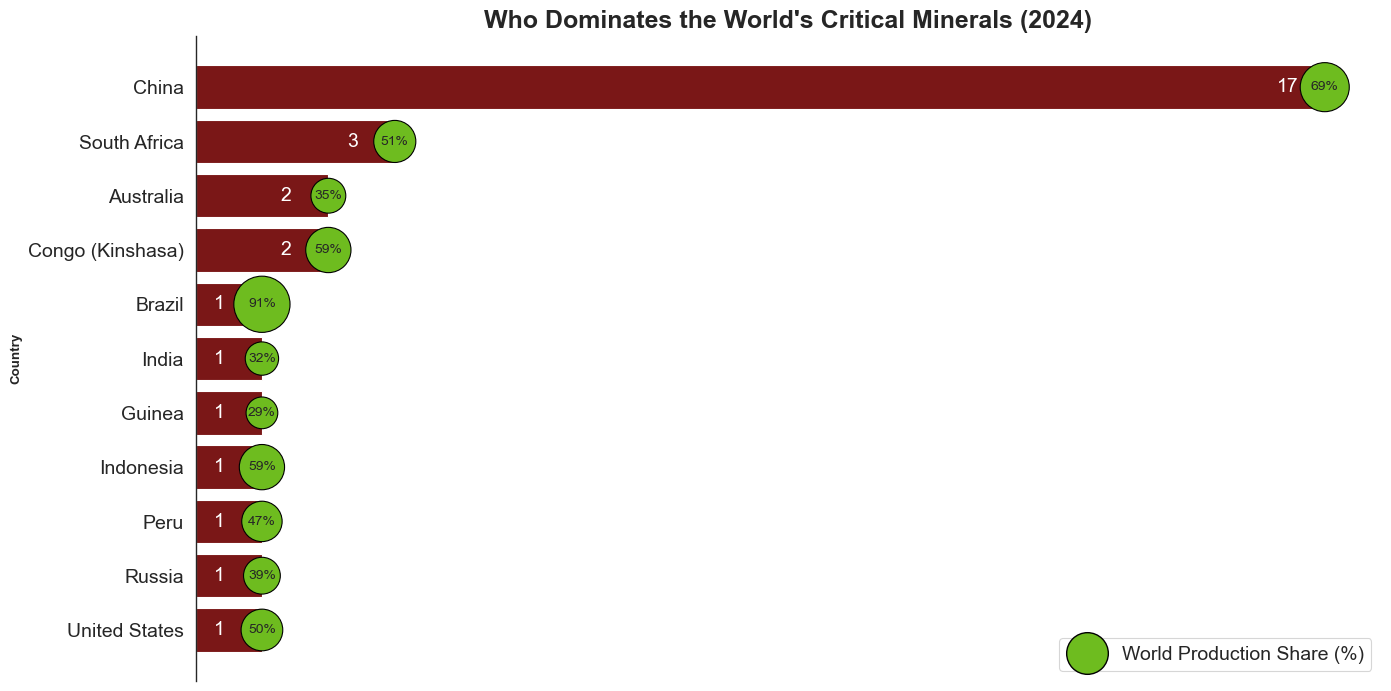

In [ ]:
from matplotlib.lines import Line2D

plt.figure(figsize=(14,7))

sns.barplot(
    global_dominance,
    y="Leading_source_country",
    x='dominant_minerals',
    color="#8A0606"
)
ax = plt.gca()

for i, row in enumerate(global_dominance.itertuples()):
    plt.text(
        row.dominant_minerals - 0.72,
        i,
        f"{row.dominant_minerals:.0f}",
        va="center",
        fontsize=14,
        color='white'
    )

sns.despine()
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_visible(False)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)

bubble_x = global_dominance["dominant_minerals"]
bubble_y = range(len(global_dominance))
bubble_size = global_dominance["avg_world_share"] * 18

ax.scatter(
    bubble_x,                  
    bubble_y,
    s=bubble_size,
    color="#6EBC1F",
    alpha=1,
    edgecolors="black",
    zorder=3
)

for i, row in enumerate(global_dominance.itertuples()):
    ax.text(
        row.dominant_minerals,
        i,
        f"{row.avg_world_share:.0f}%",
        ha="center",
        va="center",
        fontsize=10,
        zorder=4
    )

legend_elements = [
    Line2D(
        [0], [0],
        marker='o',
        color='w',
        markerfacecolor='#6EBC1F',
        markeredgecolor='black',
        markersize=30,
        label='World Production Share (%)'
    )
]

ax.legend(
    handles=legend_elements,
    title="",
    loc='lower right',
    frameon=True,
    fontsize=14,
    title_fontsize=16
)

plt.xlabel("Number of Critical Minerals Dominated")
plt.ylabel('Country')
plt.title("Who Dominates the World's Critical Minerals (2024)", fontsize=18)
plt.tight_layout()
plt.savefig("world_dominance.png", dpi=500, bbox_inches='tight')

plt.show()


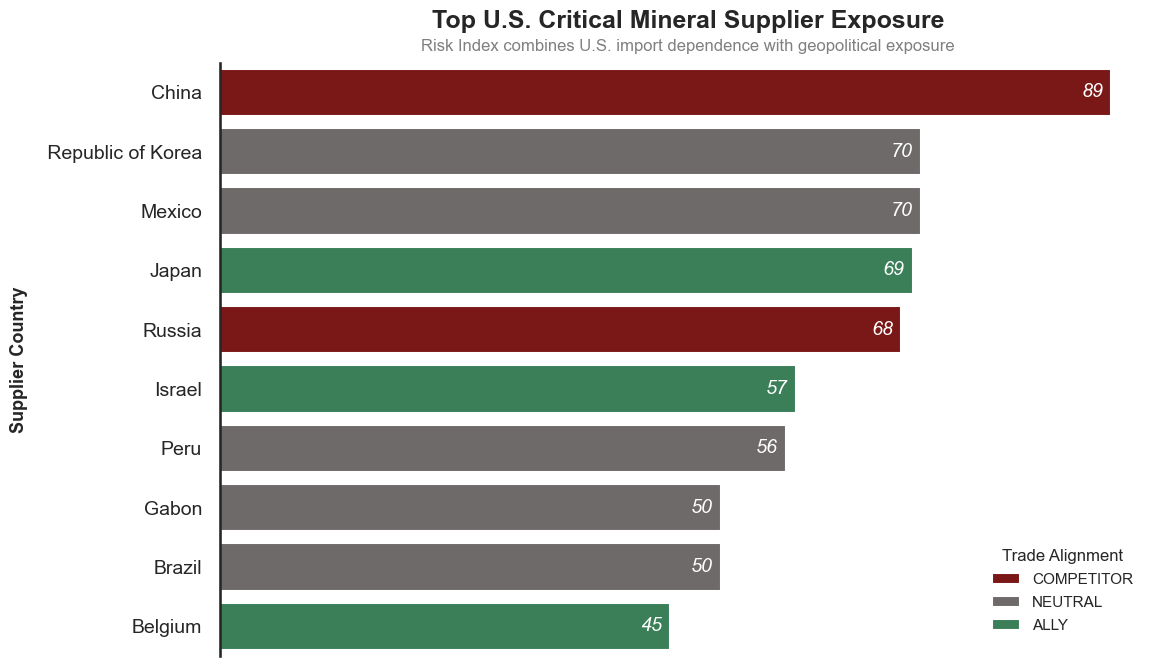

In [1293]:
plot_df = imp_reliance.reset_index()
top_risk = (
    plot_df
    .sort_values("total_risk_index", ascending=False)
    .head(10)
)

palette = {
    "ALLY": "#2E8B57",
    "NEUTRAL": "#706969",
    "COMPETITOR": "#8A0606"
}

sns.set_theme(
    style="white",
    context="talk",
    rc={
        "axes.titleweight": "bold",
        "axes.labelweight": "bold"
    }
)

plt.figure(figsize=(12,7))
sns.barplot(
    data=top_risk,
    y="Primary_import_source",
    x="total_risk_index",
    hue='primary_alignment',
    palette=palette,
    dodge=False
)

sns.despine()
ax = plt.gca()
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_visible(False)
ax.tick_params(axis='y', labelsize=14)

for i, row in enumerate(top_risk.itertuples()):
    ax.text(
        row.total_risk_index - 0.03,
        i,
        f'{row.total_risk_index * 100:.0f}',
        va='center',
        fontsize=14,
        color='white',
        fontstyle='italic'
    )


ax.set_title(
    "Top U.S. Critical Mineral Supplier Exposure",
    fontsize=18,
    fontweight="bold",
    pad=25
)

ax.set_xlabel(
    "Total Supply Risk",
    fontsize=13,
    labelpad=10
)

ax.set_ylabel(
    "Supplier Country",
    fontsize=13,
    labelpad=10
)

plt.annotate(
    "Risk Index combines U.S. import dependence with geopolitical exposure",
    xy=(0.5, 1.02),
    xycoords="axes fraction",
    ha="center",
    fontsize=12,
    color="gray"
)
ax.legend(
    title="Trade Alignment",
    loc="lower right",
    fontsize=11,
    title_fontsize=12,
    frameon=True,
    facecolor="white",
    framealpha=0.95,
    edgecolor="white",
    borderpad=1,
    labelspacing=0.6,
    handlelength=1.8
)

plt.savefig("top_us_supplier_risk.png", dpi=500, bbox_inches="tight")

plt.tight_layout()
plt.show()


In [1294]:
Critical_Minerals_End_Use = tables['Critical_Minerals_End_Use']

In [1295]:
minerals_app_df = Critical_Minerals_End_Use.copy()

minerals_app_df = minerals_app_df.rename(columns={
    "Critical Mineral": "Critical_Mineral",
    "Primary Applications": "Primary_Applications"
})


flow_1 = (
    salient_df
    .groupby(["primary_source_clean", "Critical_mineral"])
    .size()
    .reset_index(name="value")
)
flow_1.columns = ["source", "target", "value"]


flow_2 = (
    minerals_app_df
    .groupby(["Critical_Mineral", "Primary_Applications"])
    .size()
    .reset_index(name="value")
)
flow_2.columns = ["source", "target", "value"]


links_df = pd.concat([flow_1, flow_2], ignore_index=True)


all_nodes = pd.unique(
    links_df[["source", "target"]].values.ravel()
)

node_map = {name: i for i, name in enumerate(all_nodes)}

links_df["source_id"] = links_df["source"].map(node_map)
links_df["target_id"] = links_df["target"].map(node_map)

assert links_df["source_id"].isna().sum() == 0
assert links_df["target_id"].isna().sum() == 0




In [1296]:
mineral_group_map = {
    "Lithium":"Battery Metals", "Cobalt":"Battery Metals", "Nickel":"Battery Metals",
    "Manganese":"Battery Metals", "Graphite":"Battery Metals", "Vanadium":"Battery Metals",

    "Cerium":"Rare Earths", "Neodymium":"Rare Earths", "Dysprosium":"Rare Earths",
    "Yttrium":"Rare Earths", "Lanthanum":"Rare Earths", "Terbium":"Rare Earths",
    "Praseodymium":"Rare Earths", "Samarium":"Rare Earths",

    "Platinum":"PGMs", "Palladium":"PGMs", "Rhodium":"PGMs", "Ruthenium":"PGMs", "Iridium":"PGMs",

    "Aluminum":"Industrial Metals", "Copper":"Industrial Metals", "Zinc":"Industrial Metals",
    "Tin":"Industrial Metals", "Magnesium":"Industrial Metals", "Titanium":"Industrial Metals"
}

salient_df["mineral_group"] = salient_df["Critical_mineral"].map(mineral_group_map).fillna("Other")


def classify_industry(text):
    if pd.isna(text): return "Other"
    t = text.lower()
    if "battery" in t: return "Energy Storage"
    if "defense" in t or "aerospace" in t: return "Defense"
    if "semiconductor" in t or "electronics" in t: return "Electronics"
    if "catalyst" in t: return "Chemicals"
    if "metallurgy" in t: return "Manufacturing"
    if "medical" in t: return "Healthcare"
    if "solar" in t: return "Renewable Energy"
    return "Other"

minerals_app_df["industry_sector"] = minerals_app_df["Primary_Applications"].apply(classify_industry)


In [1297]:
flow_1 = (
    salient_df
    .groupby(["primary_source_clean", "mineral_group"])
    .size()
    .reset_index(name="value")
)
flow_1.columns = ["source", "target", "value"]

flow_2 = (
    minerals_app_df
    .assign(mineral_group=lambda x: x["Critical_Mineral"].map(mineral_group_map).fillna("Other"))
    .groupby(["mineral_group", "industry_sector"])
    .size()
    .reset_index(name="value")
)
flow_2.columns = ["source", "target", "value"]

links_df = pd.concat([flow_1, flow_2], ignore_index=True)


In [1298]:
all_nodes = pd.unique(links_df[["source","target"]].values.ravel())
node_map = {v:i for i,v in enumerate(all_nodes)}

links_df["source_id"] = links_df["source"].map(node_map)
links_df["target_id"] = links_df["target"].map(node_map)

assert links_df[["source_id","target_id"]].isna().sum().sum() == 0


In [1299]:


assert "primary_source_clean" in salient_df.columns
assert "Critical_mineral" in salient_df.columns
assert "Primary_Applications" in minerals_app_df.columns
assert "Critical_Mineral" in minerals_app_df.columns


def map_sector(app_text):
    if pd.isna(app_text):
        return "Manufacturing"
    t = app_text.lower()
    if "battery" in t:
        return "Energy Storage"
    if "defense" in t or "aerospace" in t:
        return "Defense"
    if "electronics" in t or "laser" in t or "semiconductor" in t:
        return "Electronics"
    if "medical" in t or "cancer" in t:
        return "Healthcare"
    if "catalyst" in t or "chemical" in t:
        return "Chemicals"
    if "solar" in t or "thermoelectric" in t:
        return "Renewable Energy"
    return "Manufacturing"

minerals_app_df["industry_sector"] = minerals_app_df["Primary_Applications"].apply(map_sector)


top_countries = (
    salient_df
    .groupby("primary_source_clean")
    .size()
    .sort_values(ascending=False)
    .head(9)
    .index
)

df = salient_df[salient_df["primary_source_clean"].isin(top_countries)].copy()


flow_1 = (
    df
    .groupby(["primary_source_clean", "Critical_mineral"])
    .size()
    .reset_index(name="value")
)

flow_1["value"] = (
    flow_1["value"] /
    flow_1.groupby("primary_source_clean")["value"].transform("sum")
)

flow_1.columns = ["source", "target", "value"]


flow_2 = (
    minerals_app_df
    .groupby(["Critical_Mineral", "industry_sector"])
    .size()
    .reset_index(name="value")
)

flow_2["value"] = (
    flow_2["value"] /
    flow_2.groupby("Critical_Mineral")["value"].transform("sum")
)

flow_2.columns = ["source", "target", "value"]


alignment_colors = {
    "ALLY": "rgba(46,139,87,0.55)",
    "NEUTRAL": "rgba(180,180,180,0.50)",
    "COMPETITOR": "rgba(138,6,6,0.65)"
}

alignment_map = (
    df[["primary_source_clean", "primary_alignment"]]
    .drop_duplicates()
    .set_index("primary_source_clean")["primary_alignment"]
)

flow_1["color"] = flow_1["source"].map(alignment_map).map(alignment_colors)
flow_2["color"] = "rgba(80,80,80,0.35)"


links_df = pd.concat([flow_1, flow_2], ignore_index=True)

nodes = pd.unique(links_df[["source", "target"]].values.ravel())
node_map = {v: i for i, v in enumerate(nodes)}

links_df["source_id"] = links_df["source"].map(node_map)
links_df["target_id"] = links_df["target"].map(node_map)



In [1300]:
top_suppliers = (
    salient_df
    .groupby("primary_source_clean")
    .size()
    .sort_values(ascending=False)
    .head(10)
    .index
    .union(["RUSSIA"])
)

df = salient_df[
    salient_df["primary_source_clean"].isin(top_suppliers)
].copy()

battery_metals = {
    "Lithium","Cobalt","Nickel","Manganese","Graphite","Vanadium"
}

rare_earths = {
    "Cerium","Dysprosium","Erbium","Europium","Gadolinium",
    "Holmium","Lanthanum","Lutetium","Neodymium","Praseodymium",
    "Samarium","Scandium","Terbium","Thulium","Ytterbium","Yttrium"
}

pgms = {"Platinum","Palladium","Rhodium","Ruthenium","Iridium"}

def mineral_group(m):
    if m in battery_metals:
        return "Battery Metals"
    if m in rare_earths:
        return "Rare Earths"
    if m in pgms:
        return "Platinum Group Metals"
    return "Industrial & Structural Metals"

df["mineral_group"] = df["Critical_mineral"].apply(mineral_group)

def industry_sector(text):
    if pd.isna(text):
        return "Manufacturing"
    t = text.lower()
    if "battery" in t:
        return "Energy Storage"
    if "defense" in t or "aerospace" in t:
        return "Defense"
    if "electronics" in t or "laser" in t or "semiconductor" in t:
        return "Electronics"
    if "medical" in t or "cancer" in t:
        return "Healthcare"
    if "catalyst" in t or "chemical" in t:
        return "Chemicals"
    if "solar" in t:
        return "Renewable Energy"
    return "Manufacturing"

minerals_app_df["industry_sector"] = minerals_app_df["Primary_Applications"].apply(industry_sector)

df = df.merge(
    minerals_app_df[["Critical_Mineral","industry_sector"]],
    left_on="Critical_mineral",
    right_on="Critical_Mineral",
    how="left"
)
industry_colors = {
    "Manufacturing": "rgba(160,160,160,0.40)",
    "Electronics": "rgba(52,152,219,0.40)",
    "Defense": "rgba(192,57,43,0.45)",
    "Energy Storage": "rgba(241,196,15,0.45)",
    "Renewable Energy": "rgba(39,174,96,0.40)",
    "Chemicals": "rgba(155,89,182,0.40)",
    "Healthcare": "rgba(231,76,60,0.40)"
}

flow_1 = (
    df
    .groupby(["primary_source_clean","mineral_group"])
    .size()
    .reset_index(name="value")
)

flow_1["value"] = (
    flow_1["value"] /
    flow_1.groupby("primary_source_clean")["value"].transform("sum")
)

flow_1.columns = ["source","target","value"]

flow_2 = (
    df
    .groupby(["mineral_group","industry_sector"])
    .size()
    .reset_index(name="value")
)

flow_2["value"] = (
    flow_2["value"] /
    flow_2.groupby("mineral_group")["value"].transform("sum")
)

flow_2.columns = ["source","target","value"]
flow_2["color"] = flow_2["target"].map(industry_colors)

alignment_colors = {
    "ALLY": "rgba(46,139,87,0.55)",
    "NEUTRAL": "rgba(180,180,180,0.45)",
    "COMPETITOR": "rgba(138,6,6,0.65)"
}

alignment_map = (
    df[["primary_source_clean","primary_alignment"]]
    .drop_duplicates()
    .set_index("primary_source_clean")["primary_alignment"]
)

flow_1["color"] = flow_1["source"].map(alignment_map).map(alignment_colors)
flow_2["color"] = "rgba(120,120,120,0.35)"

links = pd.concat([flow_1, flow_2], ignore_index=True)

nodes = pd.unique(links[["source","target"]].values.ravel())
node_map = {v:i for i,v in enumerate(nodes)}

links["source_id"] = links["source"].map(node_map)
links["target_id"] = links["target"].map(node_map)

fig = go.Figure(go.Sankey(
    arrangement="snap",

    node=dict(
        label=nodes,
        pad=18,
        thickness=20,
        color="lightgray",
        line=dict(color="black", width=0.4)
    ),

    link=dict(
    source=links["source_id"],
    target=links["target_id"],
    value=links["value"],
    color=links["color"],
    customdata=links["value"],
    hovertemplate="Supply Flow: %{customdata:,.0f} metric tons<extra></extra>"
)

))

fig.update_layout(
    title=dict(
        text="U.S. Critical Mineral Supply Chain Exposure (Policy-Grade View)",
        x=0.5,
        font=dict(size=22)
    ),
    width=1500,
    height=820,
    font_size=12
)

fig.add_annotation(
    text="Flows normalized by supplier and mineral group • Colors reflect geopolitical alignment",
    x=0.5, y=1.05, xref="paper", yref="paper",
    showarrow=False, font=dict(size=13, color="gray")
)

fig.show()
fig.write_image("us_critical_minerals_sankey_policy_clean.png", scale=3)


In [1301]:
Critical_Minerals_End_Use = Critical_Minerals_End_Use.rename(columns={
    'Critical Mineral': 'Critical_Mineral',
    'Primary Applications' : 'Primary_Applications'
})

In [1302]:

enduse = Critical_Minerals_End_Use[["Critical_Mineral", "Primary_Applications"]].copy()
salient = salient_df[["Critical_mineral", "Net_Import_Reliance_clean"]].copy()

enduse["Critical_Mineral"] = enduse["Critical_Mineral"].str.strip()
salient["Critical_mineral"] = salient["Critical_mineral"].str.strip()

df = enduse.merge(
    salient,
    left_on="Critical_Mineral",
    right_on="Critical_mineral",
    how="left"
)

df = df.drop(columns=["Critical_mineral"])

df["Net_Import_Reliance"] = df["Net_Import_Reliance_clean"].fillna(0)

df["vulnerability"] = df["Net_Import_Reliance"]

heat = df.pivot_table(
    index="Primary_Applications",
    columns="Critical_Mineral",
    values="vulnerability",
    aggfunc="mean"
).fillna(0)

heat = heat.loc[heat.mean(axis=1).sort_values(ascending=False).index]



In [1303]:
apps = Critical_Minerals_End_Use.copy()
sector_keywords = {
    "Energy Storage": ["battery", "fuel cell", "lithium", "batteries"],
    "Electronics": ["laser", "optical", "semiconductor", "electronics", "display"],
    "Aerospace and Defense": ["magnet", "permanent", "aerospace", "defense"],
    "Industrial Metals": ["metallurgy", "alloy", "structural"],
    "Chemicals": ["catalyst", "chemicals"],
    "Nuclear": ["nuclear", "reactor"]
}

def map_sector (application):
    app = application.lower()
    for sector, keywords in sector_keywords.items():
        if any(k in app for k in keywords):
            return sector
        
    return 'Other'

apps['Industry'] = apps['Primary_Applications'].apply(map_sector)

In [1304]:
apps.head(40)

,Source,Critical_Mineral,Primary_Applications,Category_Note,Industry
0,MCS2025,Aluminum,Metallurgy and many sectors of the economy.,NaN,Industrial Metals
1,MCS2025,Antimony,Flame retardants and lead-acid batteries.,NaN,Energy Storage
2,MCS2025,Arsenic,Pesticides and semiconductors.,NaN,Electronics
3,MCS2025,Barite,Hydrocarbon production.,NaN,Other
4,MCS2025,Beryllium,Aerospace and defense.,NaN,Aerospace and Defense
5,MCS2025,Bismuth,"Medical, metallurgy, and atomic research.",NaN,Industrial Metals
6,MCS2025,Cerium,"Catalytic converters, ceramics, glass, metallu...",Included in the Rare Earths chapter.,Industrial Metals
7,MCS2025,Cesium,Research and development.,NaN,Other
8,MCS2025,Chromium,Metallurgy.,NaN,Industrial Metals
9,MCS2025,Cobalt,Batteries and metallurgy.,NaN,Energy Storage


In [1305]:

net_import_reliance_df['Commodity_stripped'] = net_import_reliance_df['Commodity'].str.split(',').str[0]
net_import_reliance_df.head()

,Source,Import_Share_Order,Commodity,Net_Import_Reliance_pct_2024,Major_Import_Sources_2020_2023,Notes,commodity_clean,Commodity_stripped
0,MCS2025,1,"ARSENIC, all forms",100,"China, Morocco, Malaysia, Belgium",Descending order of import share. Imports from...,ARSENIC ALL FORMS,ARSENIC
1,MCS2025,2,ASBESTOS,100,"Brazil, Russia",Descending order of import share.,ASBESTOS,ASBESTOS
2,MCS2025,3,CESIUM,100,"Germany, China",Descending order of import share.,CESIUM,CESIUM
3,MCS2025,4,FLUORSPAR,100,"Mexico, Vietnam, South Africa, China",Descending order of import share. Imports from...,FLUORSPAR,FLUORSPAR
4,MCS2025,5,"GALLIUM, metal",100,"Japan, China, Germany, Canada",Descending order of import share.,GALLIUM METAL,GALLIUM


In [1306]:
rel = net_import_reliance_df[['Commodity_stripped', "Net_Import_Reliance_pct_2024"]]
rel.columns = ["Critical_Mineral", "ImportReliance"]
apps['Critical_Mineral'] = apps['Critical_Mineral'].str.upper()
df = apps.merge(rel, on='Critical_Mineral', how='left')
df['ImportReliance'] = df['ImportReliance'].str.replace(r'\D', '', regex=True).astype(float)
df.ImportReliance = df.ImportReliance.fillna(0)
#df.head(40)

industry_risk = (
    df.groupby('Industry')['ImportReliance']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

industry_risk.head(10)


,Industry,ImportReliance
0,Other,91.666667
1,Industrial Metals,50.266667
2,Energy Storage,49.900000
3,Electronics,33.333333
4,Chemicals,24.200000
5,Aerospace and Defense,12.500000
6,Nuclear,0.000000


In [1307]:
industry_risk.Industry.unique()

array(['Other', 'Industrial Metals', 'Energy Storage', 'Electronics',
       'Chemicals', 'Aerospace and Defense', 'Nuclear'], dtype=object)

C:\Users\farho\AppData\Local\Temp\ipykernel_38772\3813447264.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\farho\AppData\Local\Temp\ipykernel_38772\3813447264.py:28: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



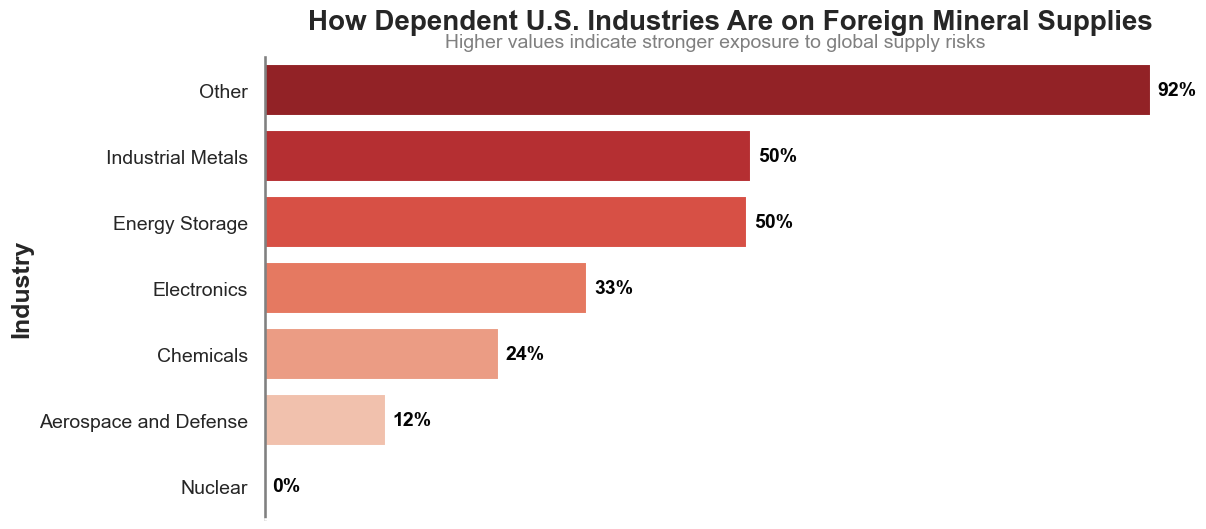

In [1308]:
plt.figure(figsize=(12,6))

sns.barplot(
    industry_risk,
    x='ImportReliance',
    y='Industry',
    palette='Reds_r'
)


plt.title(
    "How Dependent U.S. Industries Are on Foreign Mineral Supplies",
    fontsize=20, fontweight='bold', pad=20
)

plt.suptitle(
    "Higher values indicate stronger exposure to global supply risks",
    fontsize=14, y=0.92, color='gray'
)

sns.despine()
ax= plt.gca()
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('white')

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(True)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)

for container in ax.containers:
    ax.bar_label(
        container,
        fmt="%.0f%%",
        label_type='edge',
        padding=5,
        fontsize=14,
        color="#040404",
        weight='bold'
    )

plt.savefig("industries_dependency_barplot.png", dpi=500, bbox_inches='tight')
plt.show()

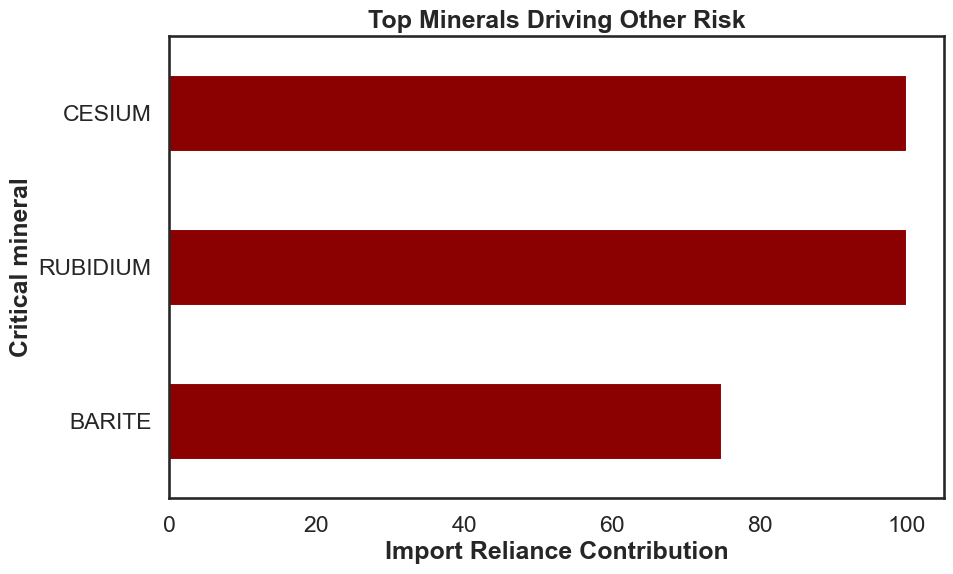

In [1309]:
top_industry = industry_risk.iloc[0]["Industry"]

subset = df[df["Industry"] == top_industry]

risk_breakdown = (
    subset.groupby("Critical_Mineral")["ImportReliance"]
          .sum()
          .sort_values(ascending=False)
          .head(8)
)

plt.figure(figsize=(10,6))
risk_breakdown.plot(kind="barh", color="darkred")

plt.title(f"Top Minerals Driving {top_industry} Risk")
plt.xlabel("Import Reliance Contribution")
plt.ylabel('Critical mineral')
plt.gca().invert_yaxis()
plt.show()


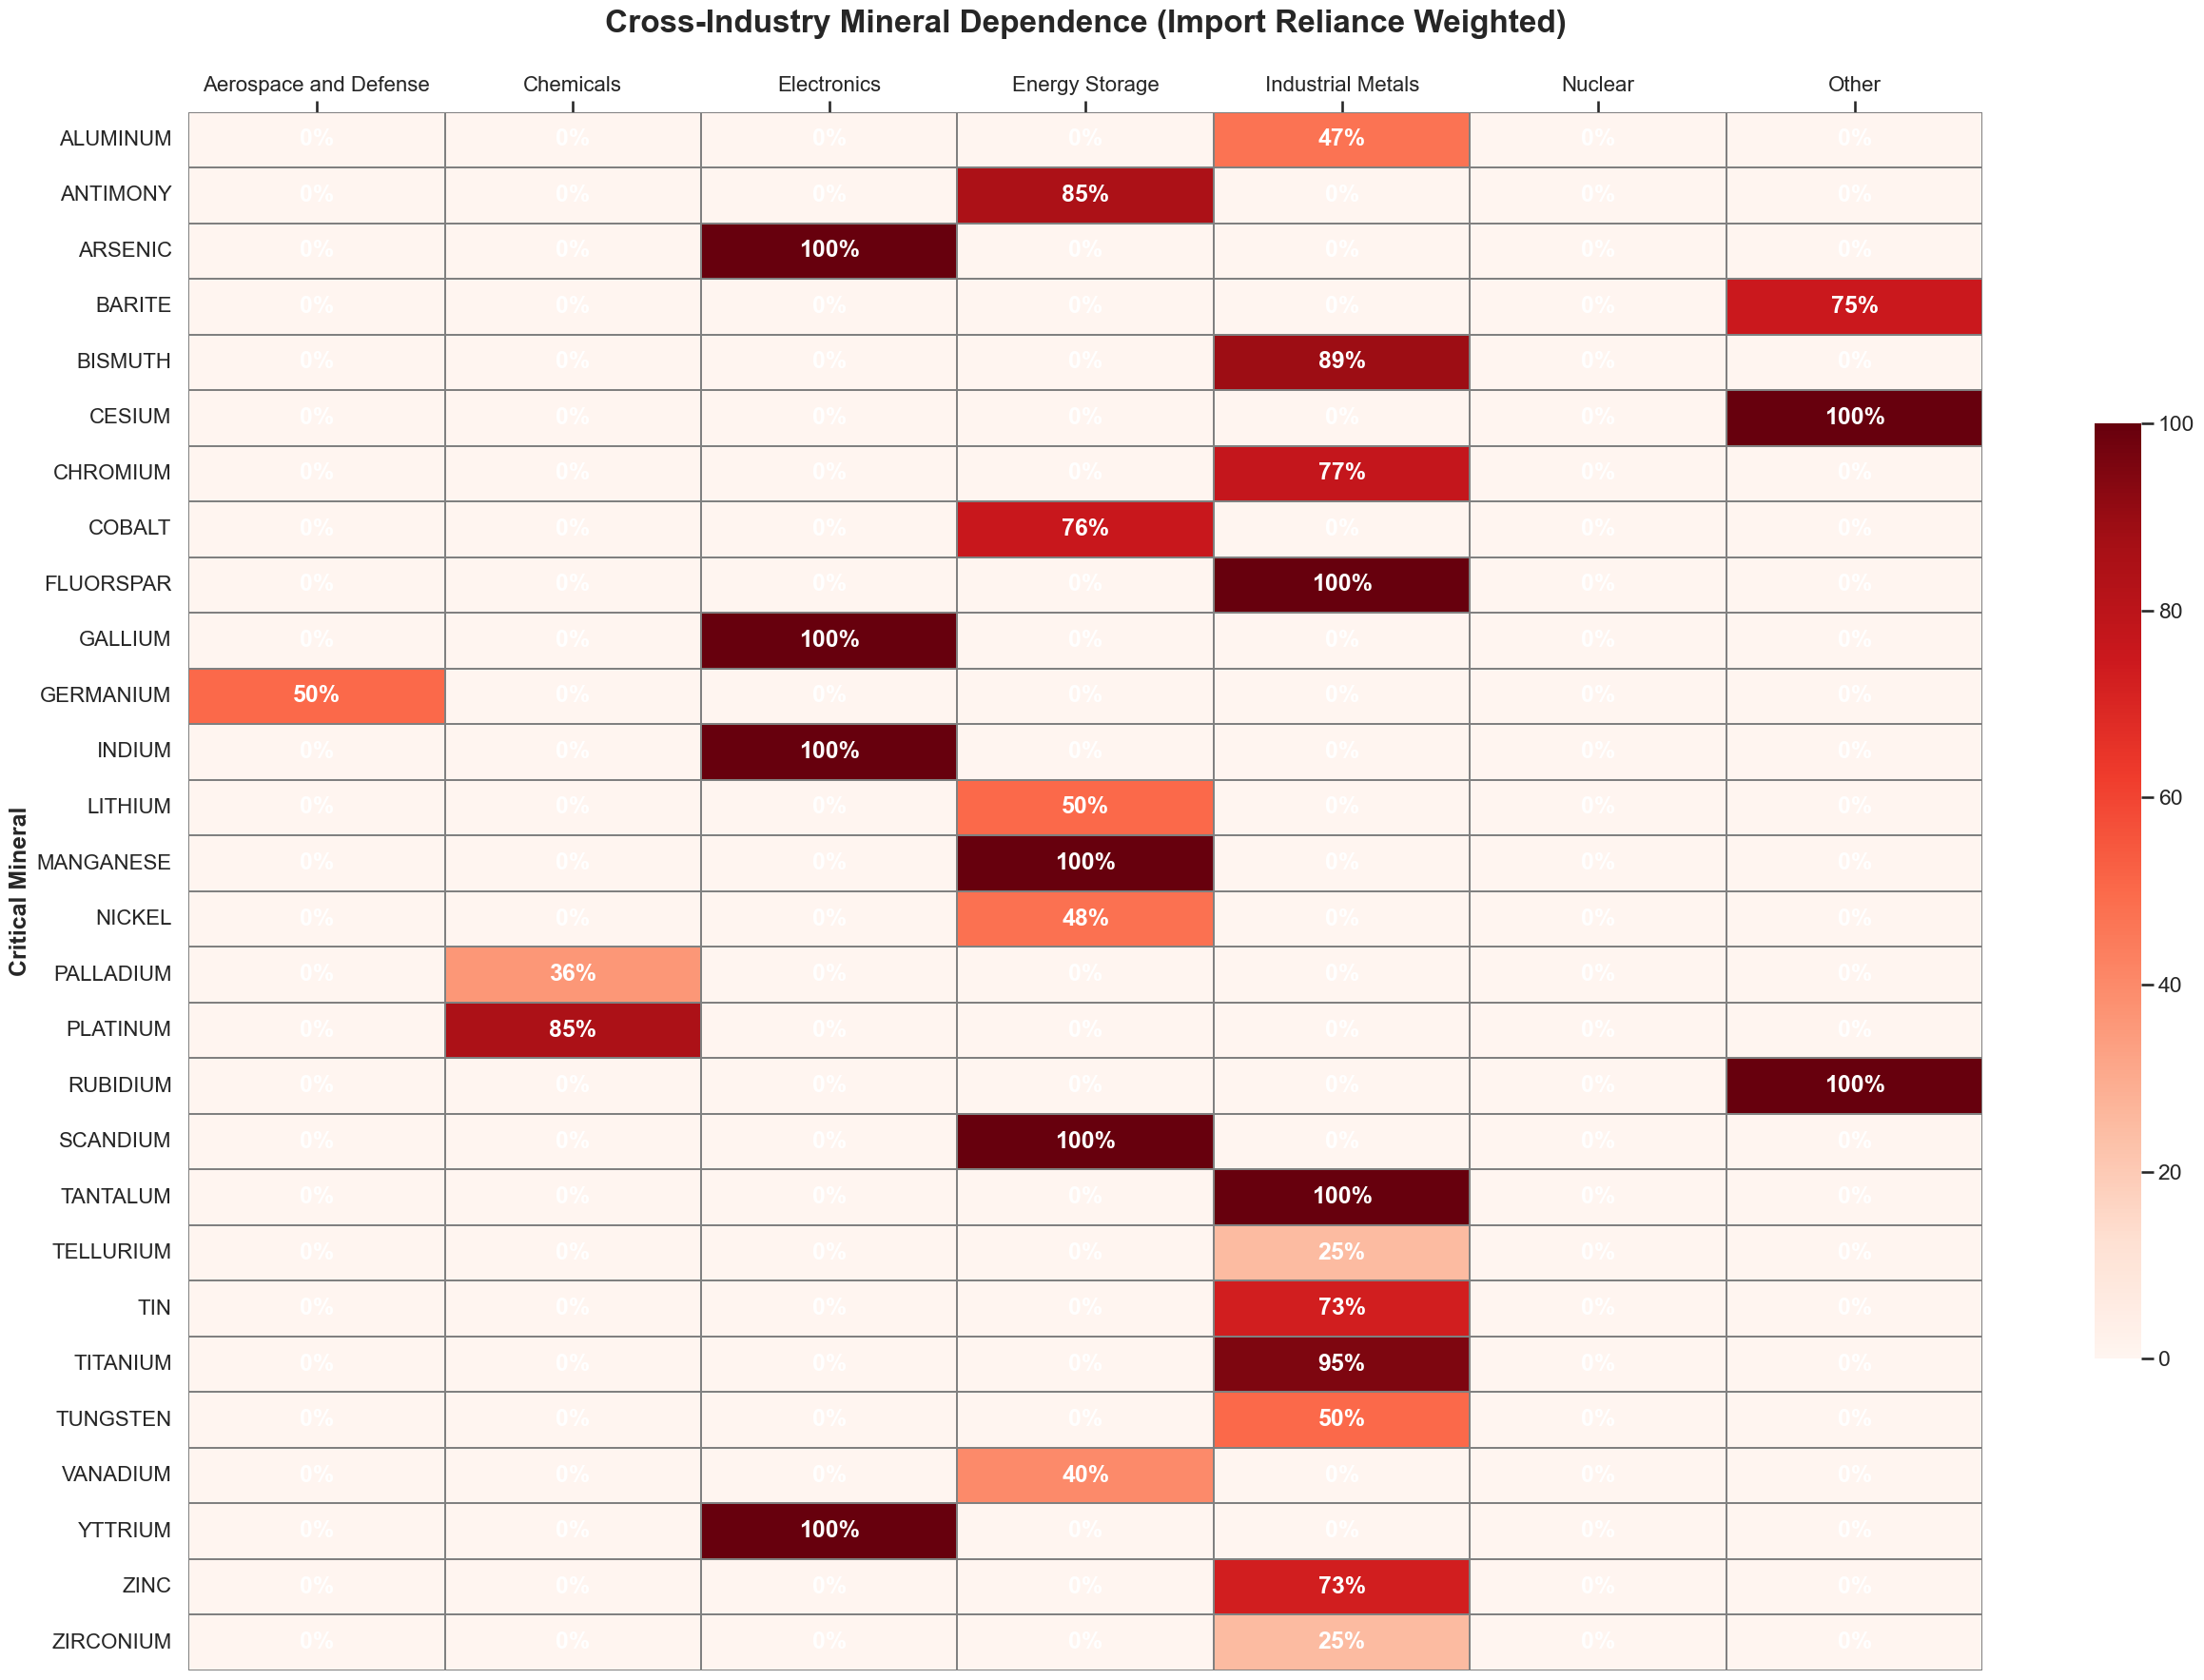

In [1310]:
pivot = df.pivot_table(
    index="Critical_Mineral",
    columns="Industry",
    values="ImportReliance",
    aggfunc="mean",
    fill_value=0
)

pivot = pivot[pivot.sum(axis=1) > 0]
pivot = pivot.astype(float)
plt.figure(figsize=(26, 18))

ax = sns.heatmap(
    pivot,
    cmap="Reds",
    linewidths=1.2,
    linecolor="gray",
    annot=True,
    fmt=".0f",
    annot_kws={'size': 18, 'color': 'white', 'weight':'bold'},
    cbar_kws={"shrink": 0.6},
)

for t in ax.texts:
    t.set_text(t.get_text() + "%")

ax.xaxis.set_label_position("top")     
ax.xaxis.tick_top()               

plt.xticks(rotation=0, ha="center", fontsize=16)
plt.yticks(fontsize=16)

plt.title(
    "Cross-Industry Mineral Dependence (Import Reliance Weighted)",
    fontsize=24,
    pad=60
)

plt.xlabel("")   
plt.ylabel("Critical Mineral", fontsize=18)

plt.tight_layout()
plt.savefig("dependency_heatmap.png", dpi=500, bbox_inches='tight')
plt.show()


In [1311]:
df = salient_df.copy()

df = df[['Critical_mineral', 'Net_Import_Reliance', 'Primary_import_source']]

df.columns = ['Critical_Mineral', 'ImportReliance', 'Country']

df['ImportReliance'] = df['ImportReliance'].astype(str).str.replace(r'\D','', regex=True)
df['ImportReliance'] = pd.to_numeric(df['ImportReliance'], errors='coerce').fillna(0)

df['Critical_Mineral'] = df['Critical_Mineral'].str.upper()
df['Country'] = df['Country'].str.title()

df = df.dropna(subset=['Country'])

df = df.sort_values('ImportReliance', ascending=False)

df.head(20)


,Critical_Mineral,ImportReliance,Country
2,ARSENIC,100.0,China
9,GALLIUM,100.0,Japan
8,FLUORSPAR,100.0,Mexico
11,GRAPHITE (NATURAL),100.0,China
12,INDIUM,100.0,Republic Of Korea
17,NIOBIUM,100.0,Brazil
15,MANGANESE,100.0,Gabon
22,TANTALUM,100.0,China
21,SCANDIUM,100.0,Japan
28,YTTRIUM,100.0,China


In [1312]:
country_to_iso = {
    "China": "cn",
    "Japan": "jp",
    "Mexico": "mx",
    "Republic Of Korea": "kr",
    "Brazil": "br",
    "Gabon": "ga",
    "South Africa": "za",
    "Norway": "no",
    "India": "in",
    "Jamaica": "jm",
    "Israel": "il",
}


In [1313]:
df = salient_df[['Critical_mineral', 'Net_Import_Reliance', 'Primary_import_source']].copy()
df.columns = ['Critical_Mineral', 'ImportReliance', 'Country']

df['Critical_Mineral'] = df['Critical_Mineral'].astype(str).str.strip().str.upper()
df['Country'] = df['Country'].astype(str).str.title()

df['ImportReliance'] = (
    df['ImportReliance']
    .astype(str)
    .str.extract(r'(\d+)', expand=False)   
    .astype(float)                          
)

df['ImportReliance'] = df['ImportReliance'].fillna(0)

df = df[df['ImportReliance'] > 0].reset_index(drop=True)

print(df.head(20))
print(df.tail(20))
print(df['ImportReliance'].describe())


                      Critical_Mineral  ImportReliance             Country
0                   ALUMINUM (BAUXITE)            75.0             Jamaica
1                             ANTIMONY            85.0               China
2                              ARSENIC           100.0               China
3                               BARITE            75.0               India
4                              BISMUTH            89.0               China
5                             CHROMIUM            77.0        South Africa
6                               COBALT            76.0              Norway
7                            FLUORSPAR           100.0              Mexico
8                              GALLIUM           100.0               Japan
9                            GERMANIUM            50.0             Belgium
10                  GRAPHITE (NATURAL)           100.0               China
11                              INDIUM           100.0   Republic Of Korea
12                       

In [1314]:
df["Country_clean"] = (
    df["Country"]
    .str.lower()
    .str.strip()
    .str.replace(r"[^a-z ]", "", regex=True)   
    .str.replace(r"\s+", "_", regex=True)      
)

country_to_iso = {
    "china": "cn",
    "mexico": "mx",
    "republic_of_korea": "kr",
    "japan": "jp",
    "gabon": "ga",
    "brazil": "br",
    "south_africa": "za",
    "norway": "no",
    "jamaica": "jm",
    "israel": "il",
    "india": "in",
    "canada": "ca",
    "peru": "pe",
    "chile": "cl",
    "belgium": "be",
    "russia": "ru"
}
df["iso"] = df["Country_clean"].map(country_to_iso)
print(df[['Country', "Country_clean", "iso"]])



               Country      Country_clean iso
0              Jamaica            jamaica  jm
1                China              china  cn
2                China              china  cn
3                India              india  in
4                China              china  cn
5         South Africa       south_africa  za
6               Norway             norway  no
7               Mexico             mexico  mx
8                Japan              japan  jp
9              Belgium            belgium  be
10               China              china  cn
11   Republic Of Korea  republic_of_korea  kr
12               Chile              chile  cl
13              Israel             israel  il
14               Gabon              gabon  ga
15              Canada             canada  ca
16              Brazil             brazil  br
17              Russia             russia  ru
18        South Africa       south_africa  za
19               China              china  cn
20               Japan            

In [1315]:
os.makedirs("flags", exist_ok=True)

iso_codes = [
    "cn","mx","kr","jp","ga","br","za","no","jm","il","in",
    "ca","pe","cl","be","ru"
]

for iso in iso_codes:
    url = f"https://flagcdn.com/w80/{iso}.png"  
    filepath = f"flags/{iso}.png"

    try:
        r = requests.get(url)
        if r.status_code == 200:
            with open(filepath, "wb") as f:
                f.write(r.content)
            print(f"Downloaded: {iso}.png")
        else:
            print(f"Failed: {iso} (status {r.status_code})")
    except Exception as e:
        print(f"Error downloading {iso}: {e}")


Downloaded: cn.png
Downloaded: mx.png
Downloaded: kr.png
Downloaded: jp.png
Downloaded: ga.png
Downloaded: br.png
Downloaded: za.png
Downloaded: no.png
Downloaded: jm.png
Downloaded: il.png
Downloaded: in.png
Downloaded: ca.png
Downloaded: pe.png
Downloaded: cl.png
Downloaded: be.png
Downloaded: ru.png


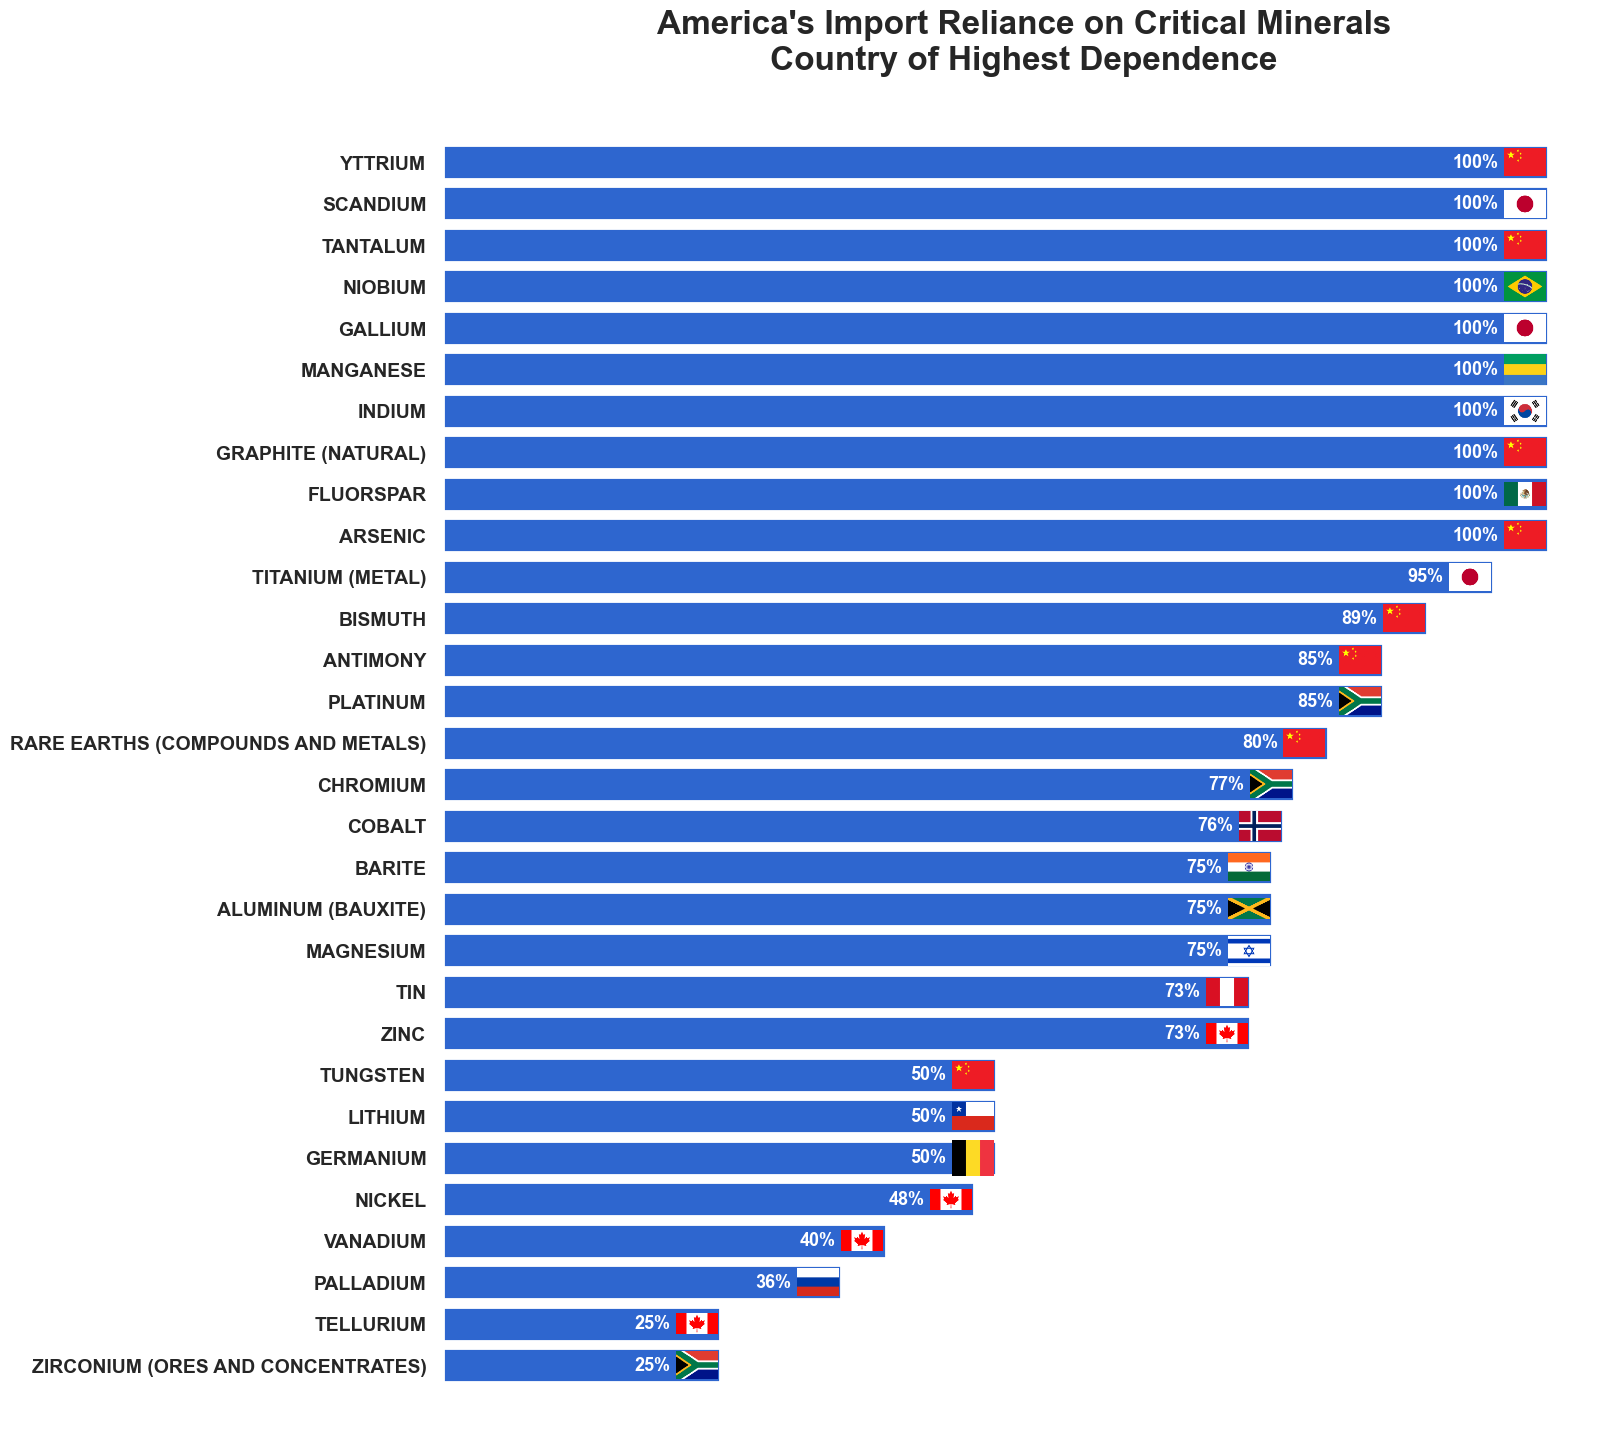

In [1316]:
df_plot = df.copy()
df_plot = df_plot.sort_values("ImportReliance", ascending=True).reset_index(drop=True)

plt.figure(figsize=(20, 16))
plt.subplots_adjust(left=0.30, right=0.88, top=0.90, bottom=0.05)
ax = plt.gca()

bars = ax.barh(
    df_plot["Critical_Mineral"],
    df_plot["ImportReliance"],
    color="#2E66CF",
    edgecolor="white",
    linewidth=1.3
)

for bar, val in zip(bars, df_plot["ImportReliance"]):
    ax.text(
        val - 4.5,
        bar.get_y() + bar.get_height() / 2,
        f"{val:.0f}%",
        va="center",
        ha="right",
        fontsize=13,
        color="white",
        fontweight="bold"
    )

flag_dir = "flags"

for i, row in df_plot.iterrows():
    iso = row["iso"]

    if pd.isna(iso):
        continue

    flag_path = f"{flag_dir}/{iso}.png"
    

    img = mpimg.imread(flag_path)
    img_box = OffsetImage(img, zoom=0.37)  

    x = row["ImportReliance"] -4         
    y = i                                 

    ab = AnnotationBbox(
        img_box,
        (x, y),
        frameon=False,
        box_alignment=(0, 0.5)
    )
    ax.add_artist(ab)

plt.title(
    "America's Import Reliance on Critical Minerals\nCountry of Highest Dependence",
    fontsize=24, fontweight="bold", pad=10
)

#ax.set_xlabel("Import Reliance (%)", fontsize=16)
#ax.set_ylabel("Critical Mineral", fontsize=16)
ax.xaxis.set_visible(False)
#plt.xticks(fontsize=13)
plt.yticks(fontsize=14, weight = 'bold')

#ax.grid(axis="x", linestyle="--", alpha=0)
sns.despine(left=True, bottom=True)
plt.savefig("import_reliance_barplot_flags.png", dpi=500, bbox_inches='tight')
plt.show()


In [1317]:
minerals_in_economy_df = tables['Minerals_in_Economy']
minerals_in_economy_df.head(20)


,Source,Year,Nonfuel_Mineral_Economic_Inputs,Value_billion_dollars,Category_example,Category_Note
0,MCS2024,2024_estimated,Mineral Raw Materials: Net Exports,4.8,"Gold, Soda Ash, Zinc concentrates, and so forth",NaN
1,MCS2024,2024_estimated,Mineral Raw Materials: Exports,10.6,"Gold, Soda Ash, Zinc concentrates, and so forth",NaN
2,MCS2024,2024_estimated,Mineral Raw Materials: Imports,5.8,"Gold, Soda Ash, Zinc concentrates, and so forth",NaN
3,MCS2024,2024_estimated,Domestically Mined Mineral Raw Materials,106.0,"Copper ores, Iron Ore, Sand and Gravel, Stone,...",NaN
4,MCS2024,2024_estimated,Domestically Recycled Metals and Mineral Produ...,48.0,"Aluminum, Glass, Steel, and so forth",NaN
5,MCS2024,2024_estimated,Old Scrap: Net Exports,19.0,"Gold, Steel, and so forth",NaN
6,MCS2024,2024_estimated,Old Scrap: Exports,26.0,"Gold, Steel, and so forth",NaN
7,MCS2024,2024_estimated,Old Scrap: Imports,8.0,"Gold, Steel, and so forth",NaN
8,MCS2024,2024_estimated,Domestically Processed Mineral Materials: Ship...,900.0,"Aluminum, Brick, Cement, Copper, Fertilizers, ...",NaN
9,MCS2024,2024_estimated,Processed Mineral Materials: Net imports,77.0,"Metals, Chemicals, and so forth",NaN


In [1318]:


rename_map = {
    "Mineral Raw Materials: Net Exports": "Raw Material Net Exports",
    "Mineral Raw Materials: Exports": "Raw Material Exports",
    "Mineral Raw Materials: Imports": "Raw Material Imports",

    "Domestically Mined Mineral Raw Materials": "Domestic Mining Output",

    "Domestically Recycled Metals and Mineral Products - Old Scrap":
        "Recycled Materials",

    "Domestically Recycled Metals and Mineral Products":
        "Recycled Materials",

    "Old Scrap: Net Exports": "Scrap Net Exports",
    "Old Scrap: Exports": "Scrap Exports",
    "Old Scrap: Imports": "Scrap Imports",

    "Domestically Processed Mineral Materials: Shipments": "Processed Materials Output",
    "Processed Mineral Materials: Net imports": "Processed Net Imports",
    "Processed Mineral Materials: Imports": "Processed Imports",
    "Processed Mineral Materials: Exports": "Processed Exports",

    "Value Added to Gross Domestic Product by Major Industries That Consume Processed Mineral Materials":
        "Value Added to GDP",

    "U.S. Economy Gross Domestic Product": "Total U.S. GDP",
}

eco = minerals_in_economy_df.copy()
eco = eco[eco["Year"] == "2024_estimated"]

eco["Nonfuel_Mineral_Economic_Inputs"] = eco["Nonfuel_Mineral_Economic_Inputs"].str.strip()

eco["Category"] = eco["Nonfuel_Mineral_Economic_Inputs"].replace(rename_map)


print(eco["Category"].unique())




['Raw Material Net Exports' 'Raw Material Exports' 'Raw Material Imports'
 'Domestic Mining Output' 'Recycled Materials' 'Scrap Net Exports'
 'Scrap Exports' 'Scrap Imports' 'Processed Materials Output'
 'Processed Net Imports' 'Processed Imports' 'Processed Exports'
 'Value Added to GDP' 'Total U.S. GDP']


In [1319]:
order = [
    "Raw Material Imports",
    "Raw Material Exports",
    "Raw Material Net Exports",
    "Domestic Mining Output",
    "Recycled Materials",
    "Scrap Exports",
    "Scrap Imports",
    "Scrap Net Exports",
    "Processed Materials Output",
    "Processed Imports",
    "Processed Exports",
    "Processed Net Imports",
    "Value Added to GDP",
    "Total U.S. GDP"
]

eco_final = eco.set_index("Category").loc[order].reset_index()
eco_final



,Category,Source,Year,Nonfuel_Mineral_Economic_Inputs,Value_billion_dollars,Category_example,Category_Note
0,Raw Material Imports,MCS2024,2024_estimated,Mineral Raw Materials: Imports,5.8,"Gold, Soda Ash, Zinc concentrates, and so forth",NaN
1,Raw Material Exports,MCS2024,2024_estimated,Mineral Raw Materials: Exports,10.6,"Gold, Soda Ash, Zinc concentrates, and so forth",NaN
2,Raw Material Net Exports,MCS2024,2024_estimated,Mineral Raw Materials: Net Exports,4.8,"Gold, Soda Ash, Zinc concentrates, and so forth",NaN
3,Domestic Mining Output,MCS2024,2024_estimated,Domestically Mined Mineral Raw Materials,106.0,"Copper ores, Iron Ore, Sand and Gravel, Stone,...",NaN
4,Recycled Materials,MCS2024,2024_estimated,Domestically Recycled Metals and Mineral Produ...,48.0,"Aluminum, Glass, Steel, and so forth",NaN
5,Scrap Exports,MCS2024,2024_estimated,Old Scrap: Exports,26.0,"Gold, Steel, and so forth",NaN
6,Scrap Imports,MCS2024,2024_estimated,Old Scrap: Imports,8.0,"Gold, Steel, and so forth",NaN
7,Scrap Net Exports,MCS2024,2024_estimated,Old Scrap: Net Exports,19.0,"Gold, Steel, and so forth",NaN
8,Processed Materials Output,MCS2024,2024_estimated,Domestically Processed Mineral Materials: Ship...,900.0,"Aluminum, Brick, Cement, Copper, Fertilizers, ...",NaN
9,Processed Imports,MCS2024,2024_estimated,Processed Mineral Materials: Imports,178.0,"Metals, Chemicals, and so forth",NaN


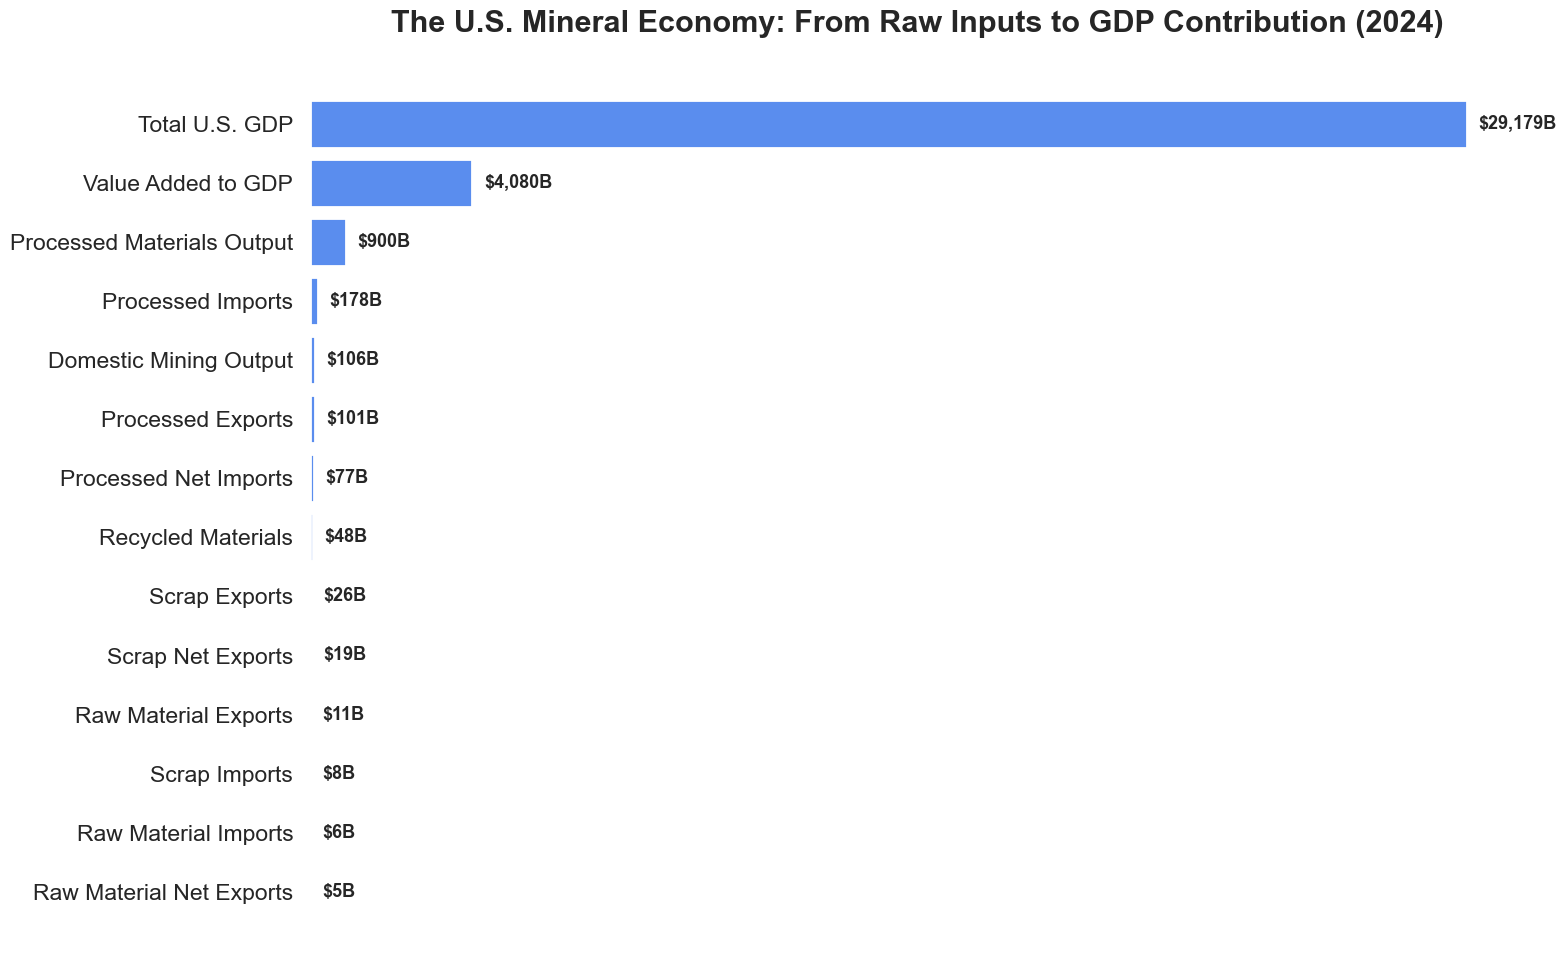

In [1320]:
eco = eco_final.copy()

eco = eco.sort_values("Value_billion_dollars")

plt.figure(figsize=(16, 10))
ax = plt.gca()

bars = ax.barh(
    eco["Category"],
    eco["Value_billion_dollars"],
    color="#5A8DEE",
    edgecolor="white",
    linewidth=1.3
)

for bar, val in zip(bars, eco["Value_billion_dollars"]):
    ax.text(
        val + max(eco["Value_billion_dollars"]) * 0.01,
        bar.get_y() + bar.get_height() / 2,
        f"${val:,.0f}B",
        va="center",
        ha="left",
        fontsize=13,
        fontweight="bold"
    )

plt.title(
    "The U.S. Mineral Economy: From Raw Inputs to GDP Contribution (2024)",
    fontsize=22,
    fontweight="bold",
    pad=20
)

ax.set_xlabel("")
ax.set_ylabel("")
ax.xaxis.set_visible(False)

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


In [1321]:
url = "https://raw.githubusercontent.com/farhodibr/CUNY-SPS-MSDS/main/DATA608/PROJECT7/DATA/Table.xlsx"

df = pd.read_excel(url, engine='openpyxl')
df = df.drop(columns=('Line'))
df = df.rename(columns={
    'Unnamed: 1' : 'Category'
})
df = df.dropna(subset=['Category']).reset_index(drop=True)
df.head(20)


,Category,2017,2018,2019,2020,2021,2022,2023,2024
0,Gross domestic product,19612.1,20656.5,21540.0,21375.3,23725.6,26054.6,27811.5,29298.0
1,Private industries,17156.3,18097.8,18909.8,18664.0,20917.7,23128.9,24712.8,26001.7
2,"Agriculture, forestry, fishing, and hunting",176.8,177.1,164.2,164.4,230.7,294.0,270.4,269.7
3,Farms,138.7,136.8,122.6,120.5,185.7,247.1,218.2,215.8
4,Crop production,73.2,70.9,57.6,52.4,101.6,131.2,118.5,101.9
5,Animal production and aquaculture,65.6,65.9,65.0,68.1,84.1,115.8,99.7,113.9
6,"Forestry, fishing, and related activities",38.1,40.3,41.6,43.9,45.0,47.0,52.2,53.9
7,Mining,267.3,313.5,294.0,202.8,336.1,466.9,411.8,404.2
8,Oil and gas extraction,161.1,189.2,172.8,104.0,225.0,329.1,259.9,252.6
9,"Mining, except oil and gas",52.3,52.5,53.1,57.3,68.2,75.4,79.8,80.8


In [1322]:
bea = df.copy()
bea.columns = bea.columns.astype(str).str.strip()
bea_2024 = bea[['Category', '2024']].copy()
bea_2024 = bea_2024.rename(columns={'2024' : 'GDP2024'})
bea_2024['Category_clean'] = bea_2024['Category'].astype(str).str.strip().str.lower()
bea_2024.head()

,Category,GDP2024,Category_clean
0,Gross domestic product,29298.0,gross domestic product
1,Private industries,26001.7,private industries
2,"Agriculture, forestry, fishing, and hunting",269.7,"agriculture, forestry, fishing, and hunting"
3,Farms,215.8,farms
4,Crop production,101.9,crop production


In [1323]:
industry_risk.Industry.unique()

array(['Other', 'Industrial Metals', 'Energy Storage', 'Electronics',
       'Chemicals', 'Aerospace and Defense', 'Nuclear'], dtype=object)

In [1324]:
industry_risk = industry_risk.copy()
industry_risk.Industry = industry_risk.Industry.astype(str).str.strip()
industry_risk

,Industry,ImportReliance
0,Other,91.666667
1,Industrial Metals,50.266667
2,Energy Storage,49.900000
3,Electronics,33.333333
4,Chemicals,24.200000
5,Aerospace and Defense,12.500000
6,Nuclear,0.000000


In [1325]:
bea_2024[bea_2024['Category_clean'].str.contains('metal', case=False, na=False)]


,Category,GDP2024,Category_clean
26,Nonmetallic mineral products,77.5,nonmetallic mineral products
27,Primary metals,76.5,primary metals
29,Nonferrous metal productio...,37.9,nonferrous metal production and processing and...
30,Fabricated metal products,190.5,fabricated metal products


In [1326]:
bea_2024[bea_2024['Category_clean'].str.contains('electronic', case=False, na=False)]


,Category,GDP2024,Category_clean
36,Computer and electronic products,299.8,computer and electronic products
39,Semiconductor and other el...,111.4,semiconductor and other electronic component m...
41,Other computer and electro...,4.9,other computer and electronic product manufact...
74,Household appliances and electrical an...,183.7,household appliances and electrical and electr...
81,Wholesale electronic markets and agent...,31.9,wholesale electronic markets and agents and br...


In [1327]:
bea_2024[bea_2024['Category_clean'].str.contains('semiconductor', case=False, na=False)]


,Category,GDP2024,Category_clean
39,Semiconductor and other el...,111.4,semiconductor and other electronic component m...


In [1328]:
bea_2024[bea_2024['Category_clean'].str.contains('aerospace', case=False, na=False)]


,Category,GDP2024,Category_clean
49,Aerospace product and part...,151.6,aerospace product and parts manufacturing


In [1329]:
bea_2024[bea_2024['Category_clean'].str.contains('chemical', case=False, na=False)]


,Category,GDP2024,Category_clean
65,Chemical products,554.0,chemical products
66,Basic chemical manufacturing,134.4,basic chemical manufacturing
69,Other chemical manufacturing,129.5,other chemical manufacturing


In [1330]:
bea_2024[bea_2024['Category_clean'].str.contains('battery', case=False, na=False)]



,Category,GDP2024,Category_clean


In [1331]:
bea_2024[bea_2024['Category_clean'].str.contains('electric', case=False, na=False)]

,Category,GDP2024,Category_clean
12,"Electric power generation, transmissio...",363.3,"electric power generation, transmission, and d..."
42,"Electrical equipment, appliances, ...",80.2,"electrical equipment, appliances, and components"
74,Household appliances and electrical an...,183.7,household appliances and electrical and electr...


In [1332]:

bea_2024[bea_2024['Category_clean'].str.contains('motor vehicle', case=False, na=False)]

,Category,GDP2024,Category_clean
43,"Motor vehicles, bodies and trailer...",185.9,"motor vehicles, bodies and trailers, and parts"
47,"Motor vehicle body, traile...",99.5,"motor vehicle body, trailer, and parts manufac..."
72,Motor vehicle and motor vehicle parts ...,112.3,motor vehicle and motor vehicle parts and supp...
84,Motor vehicle and parts dealers,356.9,motor vehicle and parts dealers


In [1333]:
mapping = {
    "Electronics": [
        "computer and electronic products",
        "semiconductor and other electronic component manufacturing",
        "other computer and electronic product manufacturing",
        "household appliances and electrical and electronic goods",
        "wholesale electronic markets and agents and brokers"
    ],
    
    "Aerospace and Defense": [
        "aerospace product and parts manufacturing"
    ],

    "Chemicals": [
        "chemical products",
        "basic chemical manufacturing",
        "other chemical manufacturing"
    ],

    "Industrial Metals": [
        "primary metals",
        "nonferrous metal production and processing",
        "nonmetallic mineral products",
        "fabricated metal products"
    ],

    "Energy Storage": [
        "electrical equipment, appliances, and components",
        "household appliances and electrical and electronic goods",
        "motor vehicles, bodies and trailers, and parts",
        "motor vehicle body, trailer, and parts manufacturing",
        "motor vehicle and motor vehicle parts and suppliers"
    ]
}


In [1334]:
for cat in mapping["Energy Storage"]:
    matches = bea_2024[bea_2024['Category_clean'].str.contains(cat.split()[0][:6], case=False, na=False)]
    print(f"\nSearch term: {cat}\nMatches:\n", matches[['Category_clean','GDP2024']])



Search term: electrical equipment, appliances, and components
Matches:
                                        Category_clean  GDP2024
12  electric power generation, transmission, and d...    363.3
36                   computer and electronic products    299.8
39  semiconductor and other electronic component m...    111.4
40  navigational, measuring, electromedical, and c...    132.9
41  other computer and electronic product manufact...      4.9
42   electrical equipment, appliances, and components     80.2
74  household appliances and electrical and electr...    183.7
81  wholesale electronic markets and agents and br...     31.9

Search term: household appliances and electrical and electronic goods
Matches:
                                         Category_clean  GDP2024
74   household appliances and electrical and electr...    183.7
175                                 private households     27.4

Search term: motor vehicles, bodies and trailers, and parts
Matches:
                 

In [1335]:
results = []

for sector, cats in mapping.items():
    gdp = bea_2024[bea_2024['Category_clean'].isin(cats)]['GDP2024'].sum()
    results.append((sector, gdp))

sector_gdp= pd.DataFrame(results, columns=['Sector', 'GDP_2024_contribution'])


In [1336]:
merged = industry_risk.merge(
    sector_gdp,
    left_on="Industry",
    right_on="Sector",
    how="left"
)

merged = merged.drop(columns=["Sector"])
#merged = merged.drop(row = [0, 6])


C:\Users\farho\AppData\Local\Temp\ipykernel_38772\3431581774.py:40: UserWarning:

First parameter to grid() is false, but line properties are supplied. The grid will be enabled.



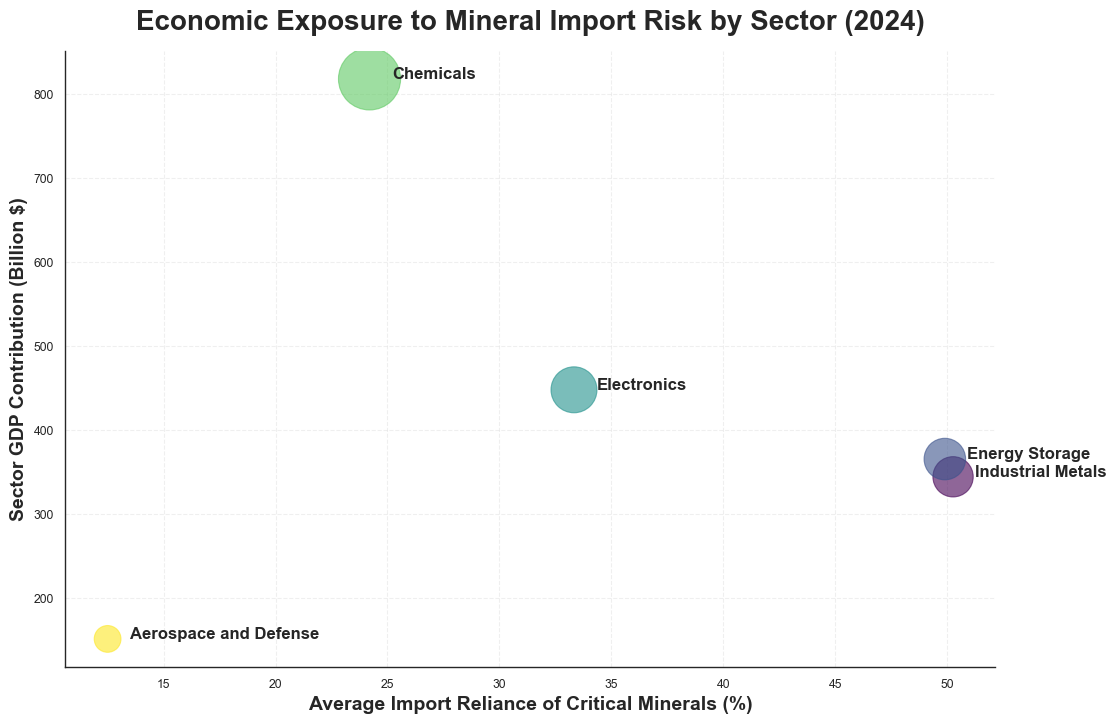

In [ ]:
sns.set_theme(style='white', context='paper')

plt.figure(figsize=(12, 8))

size = merged["GDP_2024_contribution"] / merged["GDP_2024_contribution"].max() * 2000

scatter = plt.scatter(
    merged["ImportReliance"],
    merged["GDP_2024_contribution"],
    s=size,
    alpha=0.6,
    c=range(len(merged)),
    cmap="viridis"
)

for i, row in merged.iterrows():
    plt.text(
        row["ImportReliance"] + 1,
        row["GDP_2024_contribution"],
        row["Industry"],
        fontsize=12,
        weight="bold"
    )

plt.title(
    "Economic Exposure to Mineral Import Risk by Sector (2024)",
    fontsize=20,
    weight="bold",
    pad=15
)

plt.xlabel("Average Import Reliance of Critical Minerals (%)", fontsize=14)
plt.ylabel("Sector GDP Contribution (Billion $)", fontsize=14)

plt.grid(False, linestyle="--", alpha=0.3)
sns.despine()

plt.show()


In [ ]:
sns.set_style("white")

def big_number_slide(title, items, colors, save_path=''):
    fig, ax = plt.subplots(figsize=(14,5))
    ax.axis("off")

    xs = [0.18, 0.5, 0.82]

    plt.title(title, fontsize=24, fontweight="bold", pad=20)


    for i, ((label, number, subtitle), x) in enumerate(zip(items, xs)):
        
        ax.text(x, 0.70, label, ha='center', fontsize=23, color="gray")
        ax.text(x, 0.50, number, ha='center', fontsize=52, color=colors[i], fontweight="bold")
        ax.text(x, 0.30, subtitle, ha='center', fontsize=19, color="teal")

    if save_path:
        plt.savefig(save_path, dpi=500, bbox_inches='tight')
        print("Saved to:", save_path)

    plt.show()

Saved to: industry_dependency_numbers.png


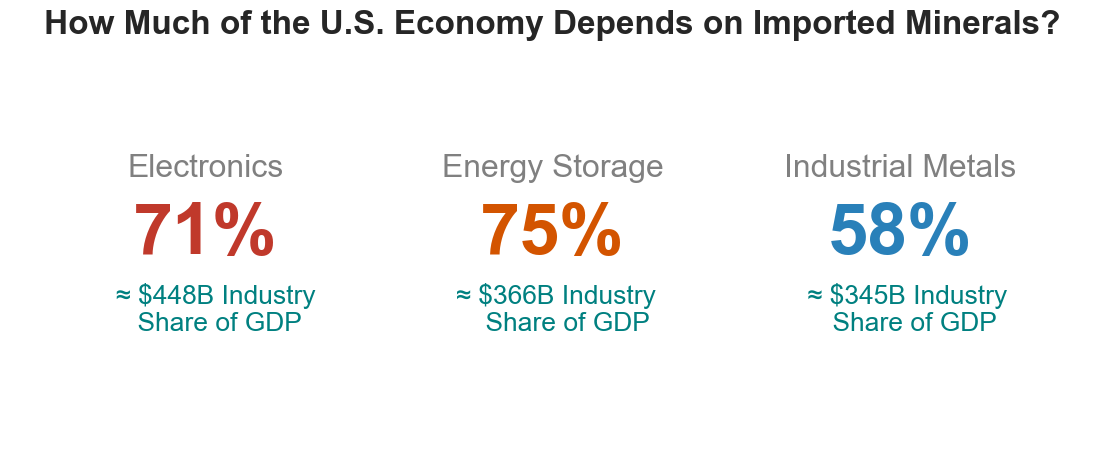

In [1339]:
items1 = [
    ("Electronics", "71%", "   ≈ $448B Industry\n\
    Share of GDP"),
    ("Energy Storage", "75%", " ≈ $366B Industry\n\
    Share of GDP"),
    ("Industrial Metals", "58%", "  ≈ $345B Industry\n\
    Share of GDP")
]

colors1 = ["#c0392b", "#d35400", "#2980b9"]

big_number_slide("How Much of the U.S. Economy Depends on Imported Minerals?",
                 items1, colors1, save_path= 'industry_dependency_numbers.png')


Saved to: supply_chain_dependency.png


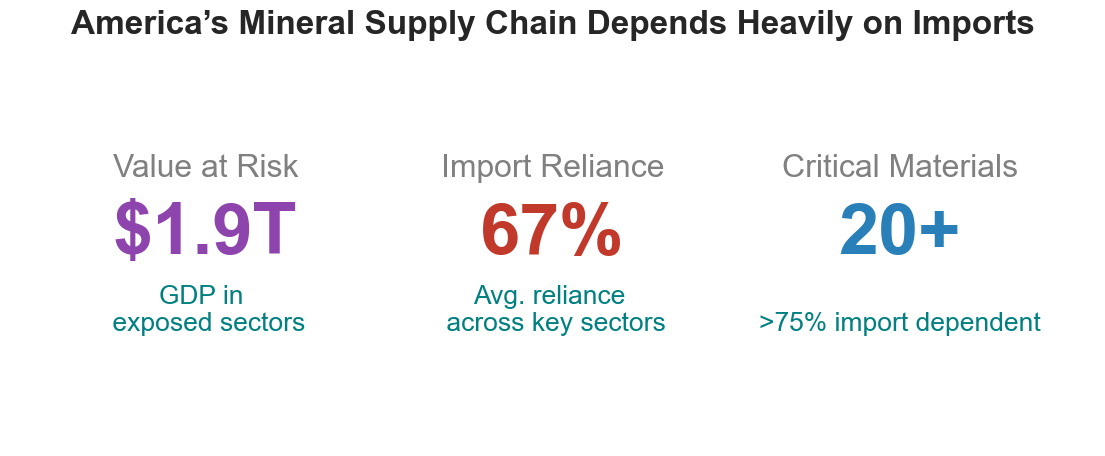

In [1343]:
items2 = [
    ("Value at Risk", "$1.9T", "GDP in \n exposed sectors"),
    ("Import Reliance", "67%", "Avg. reliance \n across key sectors"),
    ("Critical Materials", "20+", ">75% import dependent")
]

colors2 = ["#8e44ad", "#c0392b", "#2980b9"]

big_number_slide("America’s Mineral Supply Chain Depends Heavily on Imports",
                 items2, colors2, save_path='supply_chain_dependency.png')


Saved to: gdp_reliance_minerals


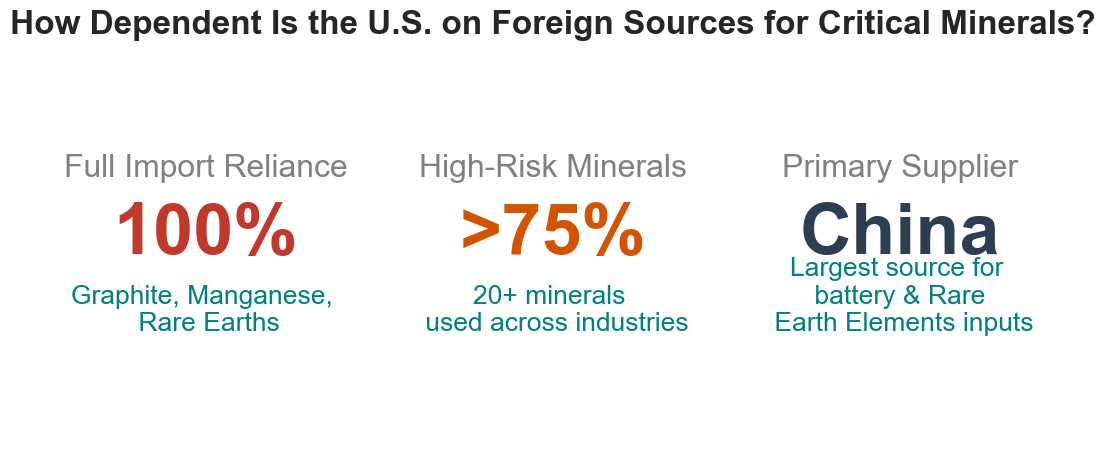

In [1341]:
items3 = [
    ("Full Import Reliance", "100%", "Graphite, Manganese, \n Rare Earths"),
    ("High-Risk Minerals", ">75%", "20+ minerals \n used across industries"),
    ("Primary Supplier", "China", "Largest source for \n battery & Rare \n Earth Elements inputs")
]

colors3 = ["#c0392b", "#d35400", "#2c3e50"]

big_number_slide("How Dependent Is the U.S. on Foreign Sources for Critical Minerals?",
                 items3, colors3, save_path='gdp_reliance_minerals')


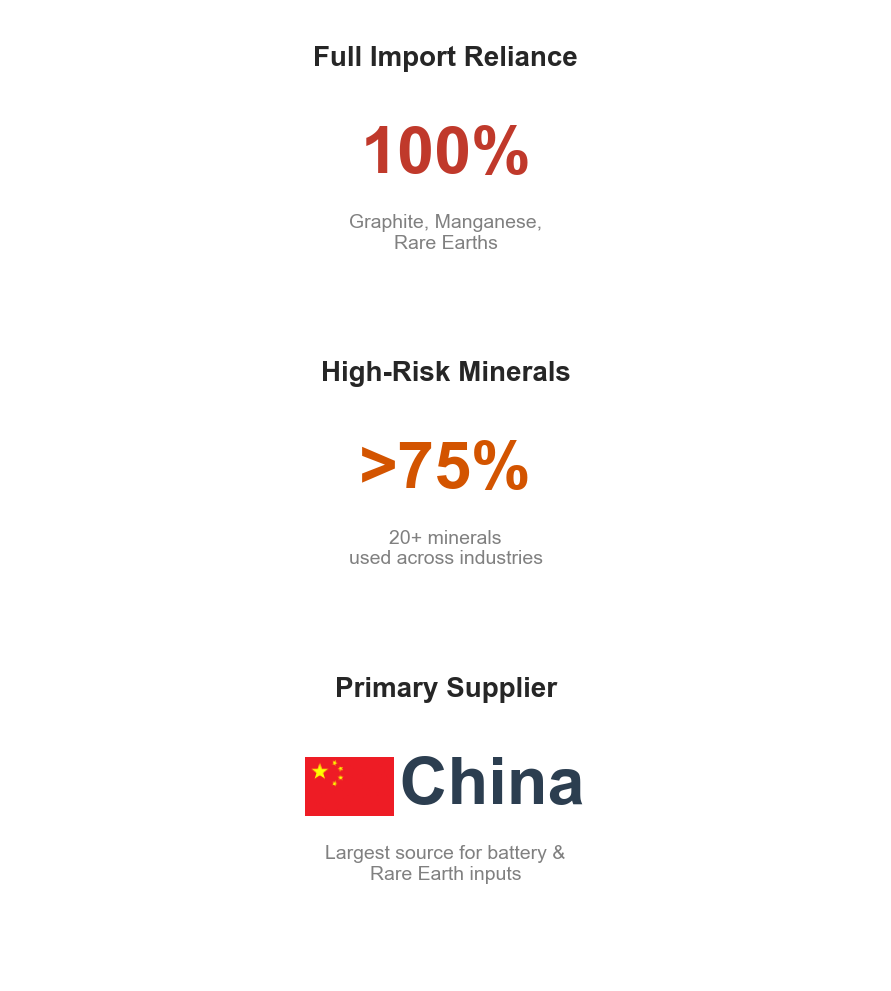

In [ ]:
items3 = [
    ("Full Import Reliance", "100%", "Graphite, Manganese,\nRare Earths"),
    ("High-Risk Minerals", ">75%", "20+ minerals\nused across industries"),
    ("Primary Supplier", "     China", "Largest source for battery &\nRare Earth inputs")
]

colors3 = ["#c0392b", "#d35400", "#2c3e50"]

flag_path = f"{flag_dir}/cn.png"   

def vertical_big_numbers(title, items, colors, flag_path):

    fig, ax = plt.subplots(figsize=(9, 10))
    ax.axis("off")

    y_positions = np.linspace(0.85, 0.20, len(items))

    for i, ((label, number, desc), color, y) in enumerate(zip(items, colors, y_positions)):
      
        ax.text(
            0.5, y + 0.10,
            label,
            ha="center",
            va="center",
            fontsize=20,
            fontweight="bold"
        )

        ax.text(
            0.5, y,
            number,
            ha="center",
            va="center",
            fontsize=48,
            fontweight="bold",
            color=color
        )

        if number.lower().strip() == "china":
            try:
                img = plt.imread(flag_path)
                img_box = OffsetImage(img, zoom=0.8)
                ab = AnnotationBbox(
                    img_box,
                    (0.39, y ),  
                    frameon=False,
                )
                ax.add_artist(ab)
            except Exception as e:
                print("Flag load error:", e)

        ax.text(
            0.5, y - 0.08,
            desc,
            ha="center",
            va="center",
            fontsize=14,
            color="gray"
        )

    plt.title(
        title,
        fontsize=26,
        fontweight="bold",
        pad=20
    )

    plt.tight_layout()
    plt.savefig("import_reliance_china.png", dpi=500, bbox_inches='tight')
    plt.show()

vertical_big_numbers(
    "",
    items3,
    colors3,
    flag_path
)

